In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style('whitegrid')

In [ ]:
#Leitura do codigo e exclusão de duplicatas
df= pd.read_excel("conceito_enade_2023.xlsx")

df_ = df.drop_duplicates()

In [ ]:
#Coletando as linhas que estão vazias
linhas_vazias = df[df.isna().any(axis=1)]

#Excluindo as linhas em que conceito enade (Faixa) == SC
dfl = df[df['Conceito Enade (Faixa)'] != 'SC']

#Excluindo colunas que nao seram uteis para a analise
dfc = dfl.drop(['Código da Área','Código da IES','Sigla da IES*','Código do Curso', 'Código do Município**', 'Nota Bruta - FG', 'Nota Bruta - CE', ], axis = 1)

In [ ]:
mapeamento_tipo = {
    'Pública Federal': 'Pública',
    'Pública Estadual': 'Pública',
    'Pública Municipal': 'Pública',
    'Privada com fins lucrativos': 'Privada',
    'Privada sem fins lucrativos': 'Privada',
    'Especial': 'Privada'
}

dfc['Tipo de Instituição'] = dfc['Categoria Administrativa'].map(mapeamento_tipo)

In [ ]:
dfc.columns


Index(['Ano', 'Área de Avaliação', 'Grau Acadêmico', 'Nome da IES*',
       'Organização Acadêmica', 'Categoria Administrativa',
       'Modalidade de Ensino', 'Município do Curso**', 'Sigla da UF** ',
       'Nº de Concluintes Inscritos', 'Nº  de Concluintes Participantes',
       'Nota Padronizada - FG', 'Nota Padronizada - CE',
       'Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)',
       'Entidade Beneficiente de Assistência Social (CEBAS)',
       'Tipo de Instituição'],
      dtype='object')

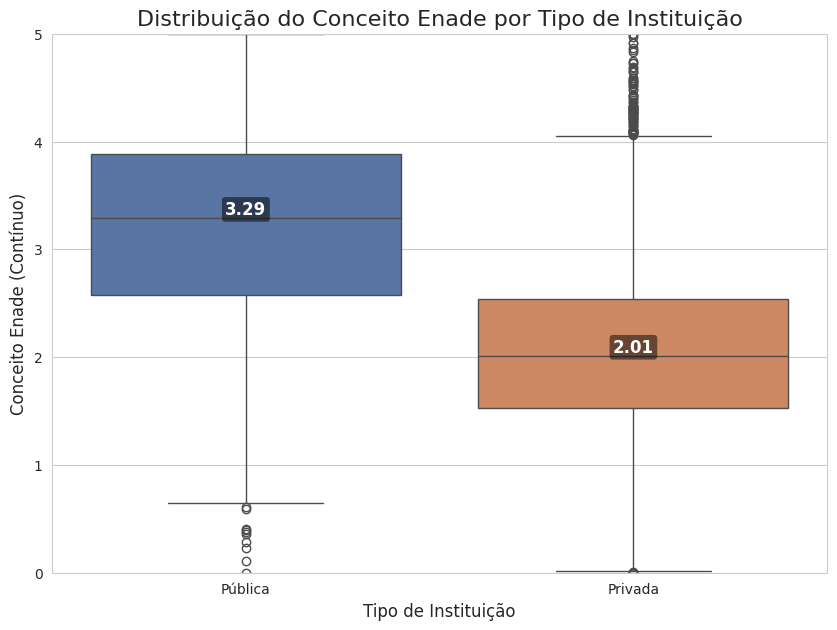

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame 'dfc' e a coluna 'Tipo de Instituição' já existem.

plt.figure(figsize=(10, 7))

# --- AJUSTE 1: Corrigindo o FutureWarning ---
# Adicionamos hue='Tipo de Instituição' e legend=False, como a mensagem de aviso sugere.
ax = sns.boxplot(
    data=dfc,
    x='Tipo de Instituição',
    y='Conceito Enade (Contínuo)',
    hue='Tipo de Instituição', # Adicionado para seguir a nova prática do Seaborn
    palette=['#4c72b0', '#dd8452'],
    legend=False # Adicionado para não mostrar a legenda, que é redundante aqui
)

# --- CÓDIGO PARA ADICIONAR OS VALORES DA MEDIANA ---

# --- AJUSTE 2: Corrigindo o AttributeError ---
# O método correto é pegar os 'xticklabels' e depois extrair o texto de cada um com .get_text()
labels = [label.get_text() for label in ax.get_xticklabels()]
medianas = dfc.groupby('Tipo de Instituição')['Conceito Enade (Contínuo)'].median().loc[labels]


# 2. Loop para adicionar o texto no gráfico
for i, med in enumerate(medianas):
    ax.text(i, med, f'{med:.2f}',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold',
            color='white',
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.2', edgecolor='none'))

# Configurações finais do gráfico
plt.title('Distribuição do Conceito Enade por Tipo de Instituição', fontsize=16)
plt.xlabel('Tipo de Instituição', fontsize=12)
plt.ylabel('Conceito Enade (Contínuo)', fontsize=12)
plt.ylim(0, 5)
plt.show()

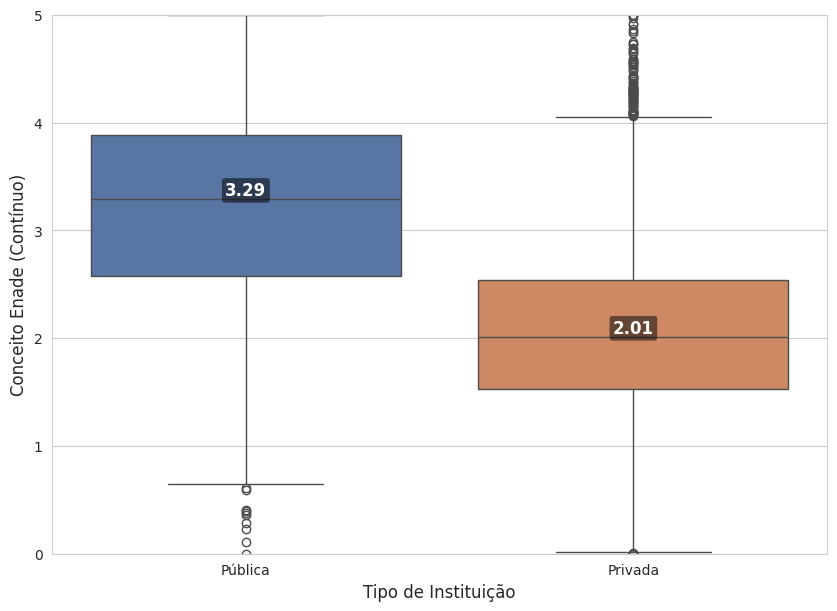

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame 'dfc' e a coluna 'Tipo de Instituição' já existem.

plt.figure(figsize=(10, 7))

# --- AJUSTE 1: Corrigindo o FutureWarning ---
# Adicionamos hue='Tipo de Instituição' e legend=False, como a mensagem de aviso sugere.
ax = sns.boxplot(
    data=dfc,
    x='Tipo de Instituição',
    y='Conceito Enade (Contínuo)',
    hue='Tipo de Instituição', # Adicionado para seguir a nova prática do Seaborn
    palette=['#4c72b0', '#dd8452'],
    legend=False # Adicionado para não mostrar a legenda, que é redundante aqui
)

# --- CÓDIGO PARA ADICIONAR OS VALORES DA MEDIANA ---

# --- AJUSTE 2: Corrigindo o AttributeError ---
# O método correto é pegar os 'xticklabels' e depois extrair o texto de cada um com .get_text()
labels = [label.get_text() for label in ax.get_xticklabels()]
medianas = dfc.groupby('Tipo de Instituição')['Conceito Enade (Contínuo)'].median().loc[labels]


# 2. Loop para adicionar o texto no gráfico
for i, med in enumerate(medianas):
    ax.text(i, med, f'{med:.2f}',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold',
            color='white',
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.2', edgecolor='none'))

# Configurações finais do gráfico
plt.xlabel('Tipo de Instituição', fontsize=12)
plt.ylabel('Conceito Enade (Contínuo)', fontsize=12)
plt.ylim(0, 5)
plt.show()

/tmp/ipython-input-3734012194.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


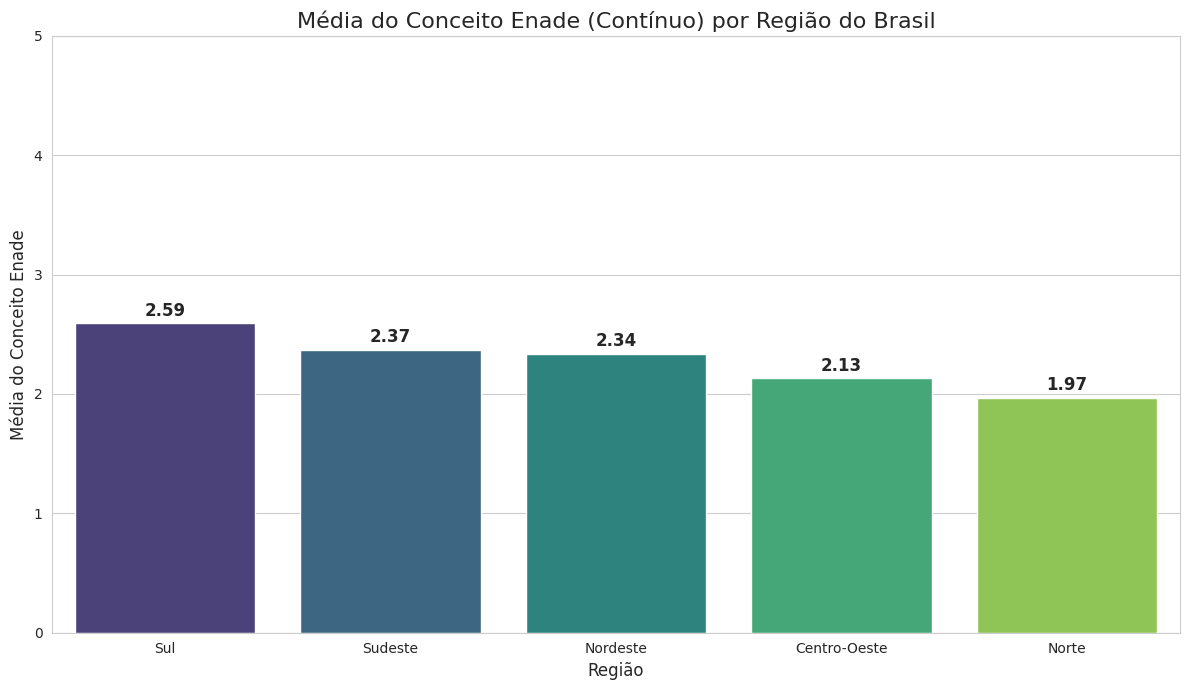

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seu código de preparação de dados
mapa_regioes = {
    'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
    'Nordeste': ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'],
    'Centro-Oeste': ['MT', 'MS', 'GO', 'DF'],
    'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
    'Sul': ['PR', 'RS', 'SC']
}
uf_para_regiao = {uf: regiao for regiao, ufs in mapa_regioes.items() for uf in ufs}
dfc['Região'] = dfc['Sigla da UF** '].str.strip().map(uf_para_regiao)
media_por_regiao = dfc.groupby('Região')['Conceito Enade (Contínuo)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x=media_por_regiao.index,
    y=media_por_regiao.values,
    palette='viridis'
)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + 0.03, # Um pouco acima da barra
        s=f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.title('Média do Conceito Enade (Contínuo) por Região do Brasil', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Média do Conceito Enade', fontsize=12)
# --- ALTERAÇÃO AQUI: Definindo o limite superior do eixo Y para 5 ---
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1629270910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


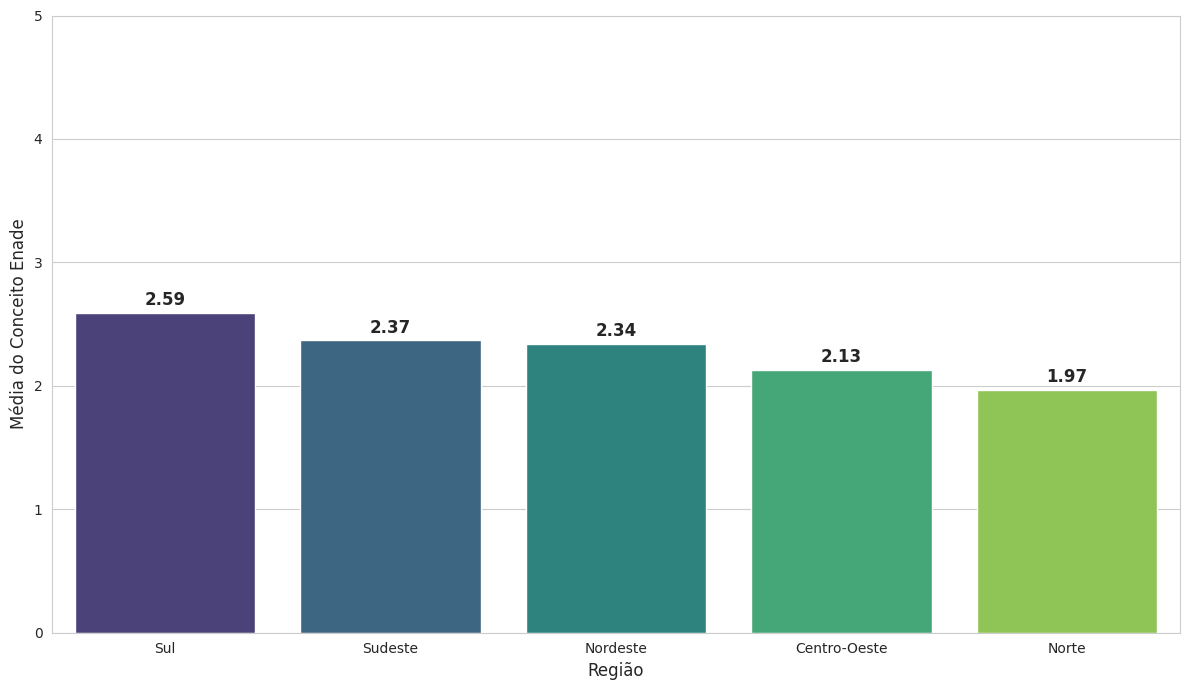

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seu código de preparação de dados
mapa_regioes = {
    'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
    'Nordeste': ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'],
    'Centro-Oeste': ['MT', 'MS', 'GO', 'DF'],
    'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
    'Sul': ['PR', 'RS', 'SC']
}
uf_para_regiao = {uf: regiao for regiao, ufs in mapa_regioes.items() for uf in ufs}
dfc['Região'] = dfc['Sigla da UF** '].str.strip().map(uf_para_regiao)
media_por_regiao = dfc.groupby('Região')['Conceito Enade (Contínuo)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x=media_por_regiao.index,
    y=media_por_regiao.values,
    palette='viridis'
)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + 0.03, # Um pouco acima da barra
        s=f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )


plt.xlabel('Região', fontsize=12)
plt.ylabel('Média do Conceito Enade', fontsize=12)
# --- ALTERAÇÃO AQUI: Definindo o limite superior do eixo Y para 5 ---
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2519756645.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


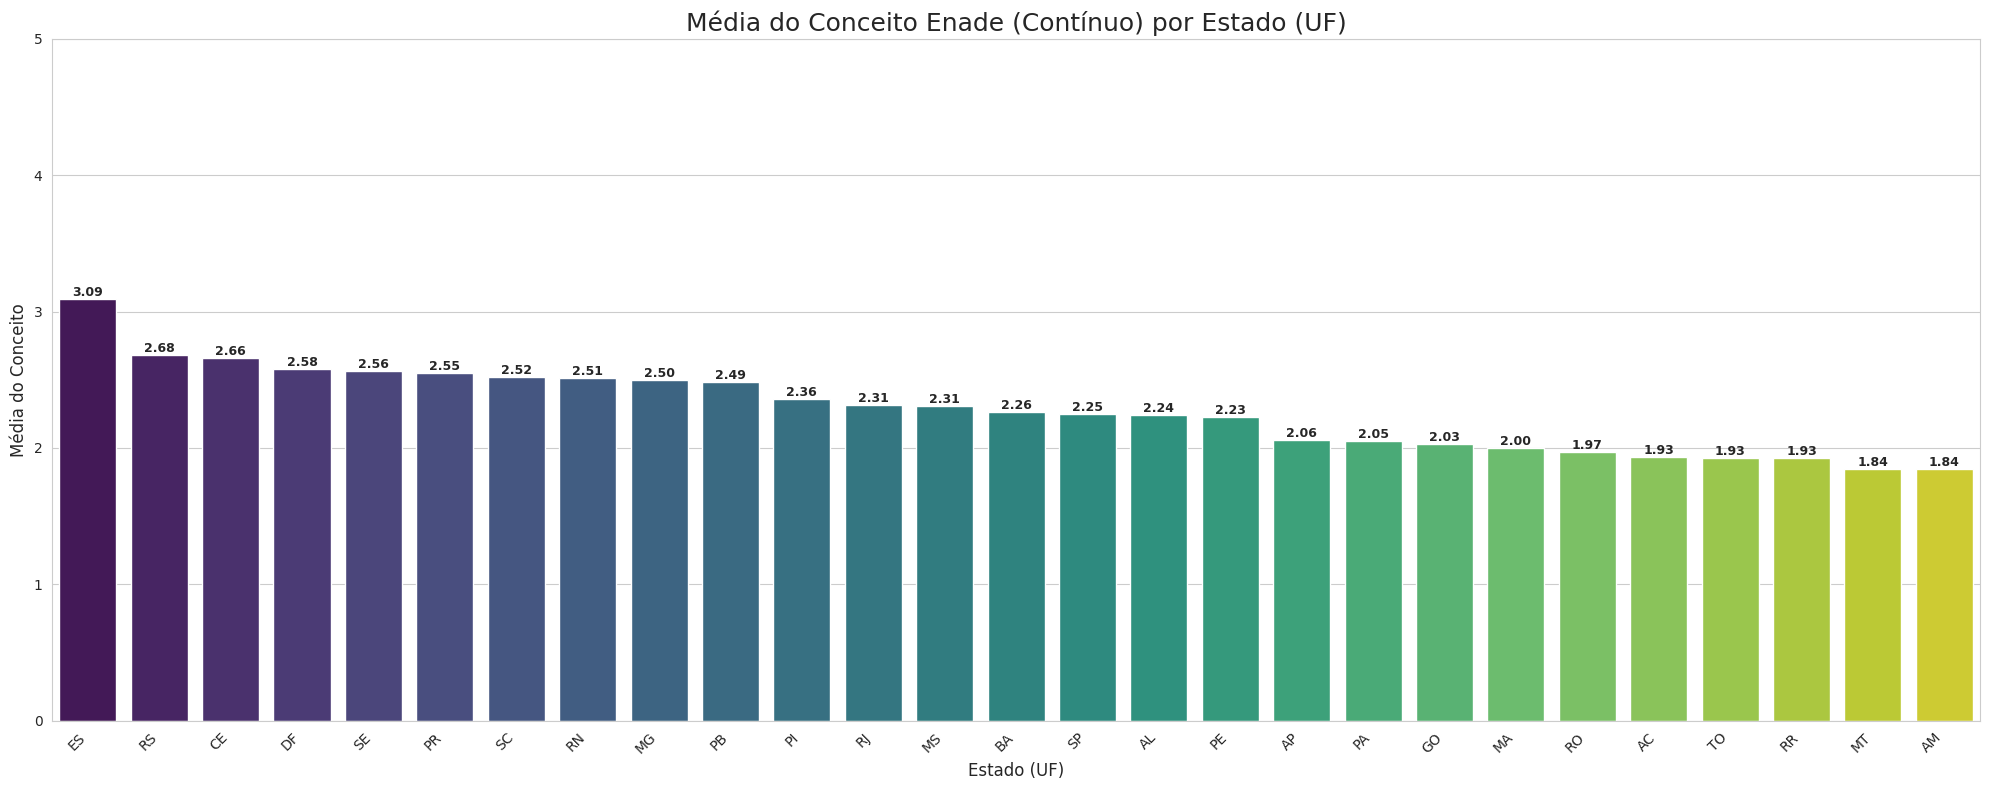

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seu código de preparação dos dados
# dfc.columns = dfc.columns.str.strip() # Boa prática para limpar nomes de colunas
media_por_uf = dfc.groupby('Sigla da UF** ')['Conceito Enade (Contínuo)'].mean().sort_values(ascending=False)

# Usamos uma figura maior para que os 27 estados fiquem legíveis
plt.figure(figsize=(20, 8))

# 1. Capturamos o gráfico na variável 'ax'
ax = sns.barplot(
    x=media_por_uf.index,
    y=media_por_uf.values,
    palette='viridis'
)

# 2. Adicionamos o laço 'for' para anotar cada barra
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,  # Posição X (no centro da barra)
        y=height,                             # Posição Y (no topo da barra)
        s=f'{height:.2f}',                    # O texto a ser exibido
        ha='center',
        va='bottom',
        fontsize=9, # Fonte um pouco menor devido à quantidade de barras
        fontweight='bold'
    )

# Melhorias no gráfico
plt.title('Média do Conceito Enade (Contínuo) por Estado (UF)', fontsize=18)
plt.xlabel('Estado (UF)', fontsize=12)
plt.ylabel('Média do Conceito', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes dos estados para melhor leitura
plt.ylim(0, 5)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

/tmp/ipython-input-3465668997.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


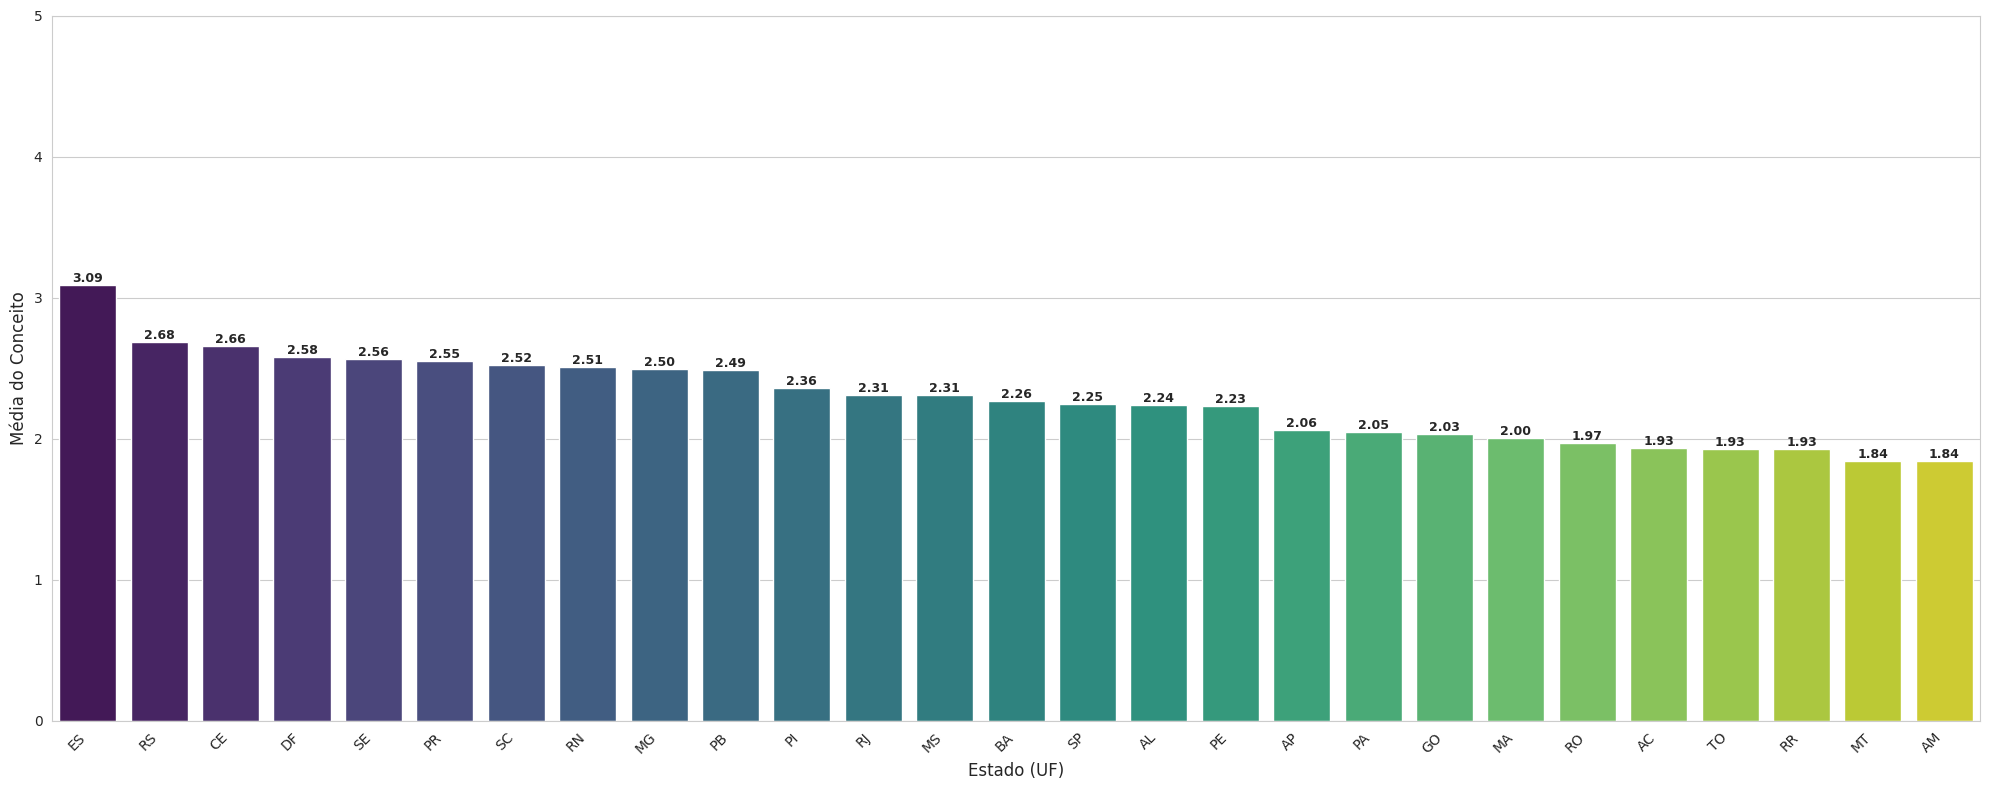

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seu código de preparação dos dados
# dfc.columns = dfc.columns.str.strip() # Boa prática para limpar nomes de colunas
media_por_uf = dfc.groupby('Sigla da UF** ')['Conceito Enade (Contínuo)'].mean().sort_values(ascending=False)

# Usamos uma figura maior para que os 27 estados fiquem legíveis
plt.figure(figsize=(20, 8))

# 1. Capturamos o gráfico na variável 'ax'
ax = sns.barplot(
    x=media_por_uf.index,
    y=media_por_uf.values,
    palette='viridis'
)

# 2. Adicionamos o laço 'for' para anotar cada barra
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,  # Posição X (no centro da barra)
        y=height,                             # Posição Y (no topo da barra)
        s=f'{height:.2f}',                    # O texto a ser exibido
        ha='center',
        va='bottom',
        fontsize=9, # Fonte um pouco menor devido à quantidade de barras
        fontweight='bold'
    )

# Melhorias no gráfico

plt.xlabel('Estado (UF)', fontsize=12)
plt.ylabel('Média do Conceito', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes dos estados para melhor leitura
plt.ylim(0, 5)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

/tmp/ipython-input-3939354078.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


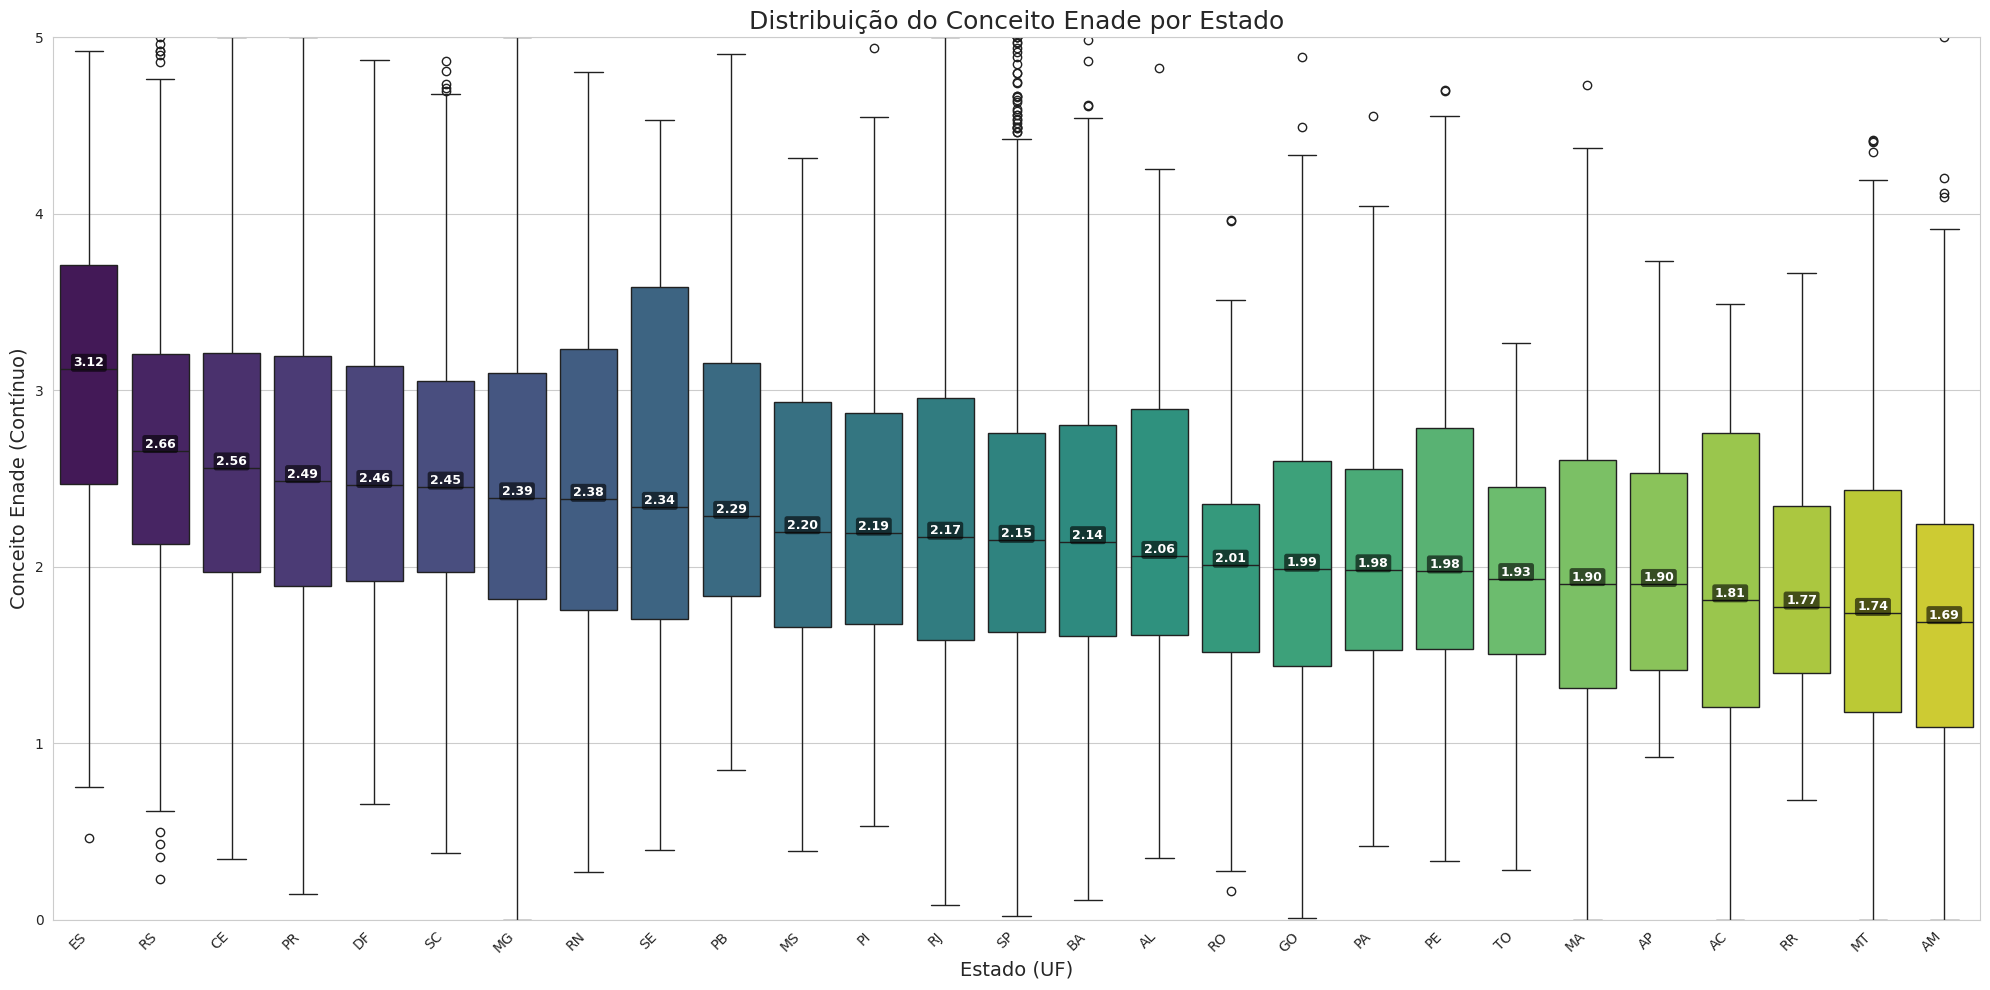

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. LIMPEZA E PREPARAÇÃO DOS DADOS ---
# Para evitar erros, limpamos a coluna da UF e a guardamos em uma nova coluna 'UF'
dfc['UF'] = dfc['Sigla da UF** '].str.strip()

# Agora, usamos a coluna limpa 'UF' para todo o resto.
# Calculamos a mediana por estado para definir a ordem do gráfico
ordem_estados = dfc.groupby('UF')['Conceito Enade (Contínuo)'].median().sort_values(ascending=False).index

# Calculamos as medianas na ordem correta para usar nos rótulos
medianas = dfc.groupby('UF')['Conceito Enade (Contínuo)'].median().loc[ordem_estados]

# --- 2. CRIAÇÃO DO GRÁFICO ---
# Criamos a figura, aumentando o tamanho para caber todos os estados
plt.figure(figsize=(20, 10))

# Criamos o Boxplot com os estados ordenados e capturamos em 'ax'
ax = sns.boxplot(
    data=dfc,
    x='UF', # Usamos a coluna limpa
    y='Conceito Enade (Contínuo)',
    order=ordem_estados,  # Aplica a ordem que calculamos
    palette='viridis'
)

# --- 3. ADIÇÃO DOS VALORES DA MEDIANA ---
# Usamos o mesmo loop do primeiro exemplo de boxplot
for i, med in enumerate(medianas):
    ax.text(i, med, f'{med:.2f}',
            ha='center',
            va='bottom',
            fontsize=9, # Fonte menor para não poluir o gráfico
            fontweight='bold',
            color='white',
            bbox=dict(facecolor='black', alpha=0.6, boxstyle='round,pad=0.2', edgecolor='none'))

# --- 4. MELHORIAS NO GRÁFICO ---
plt.title('Distribuição do Conceito Enade por Estado', fontsize=18)
plt.xlabel('Estado (UF)', fontsize=14)
plt.ylabel('Conceito Enade (Contínuo)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes dos estados
plt.ylim(0, 5) # Garante a escala de 0 a 5
plt.tight_layout()
plt.show()

/tmp/ipython-input-474119671.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


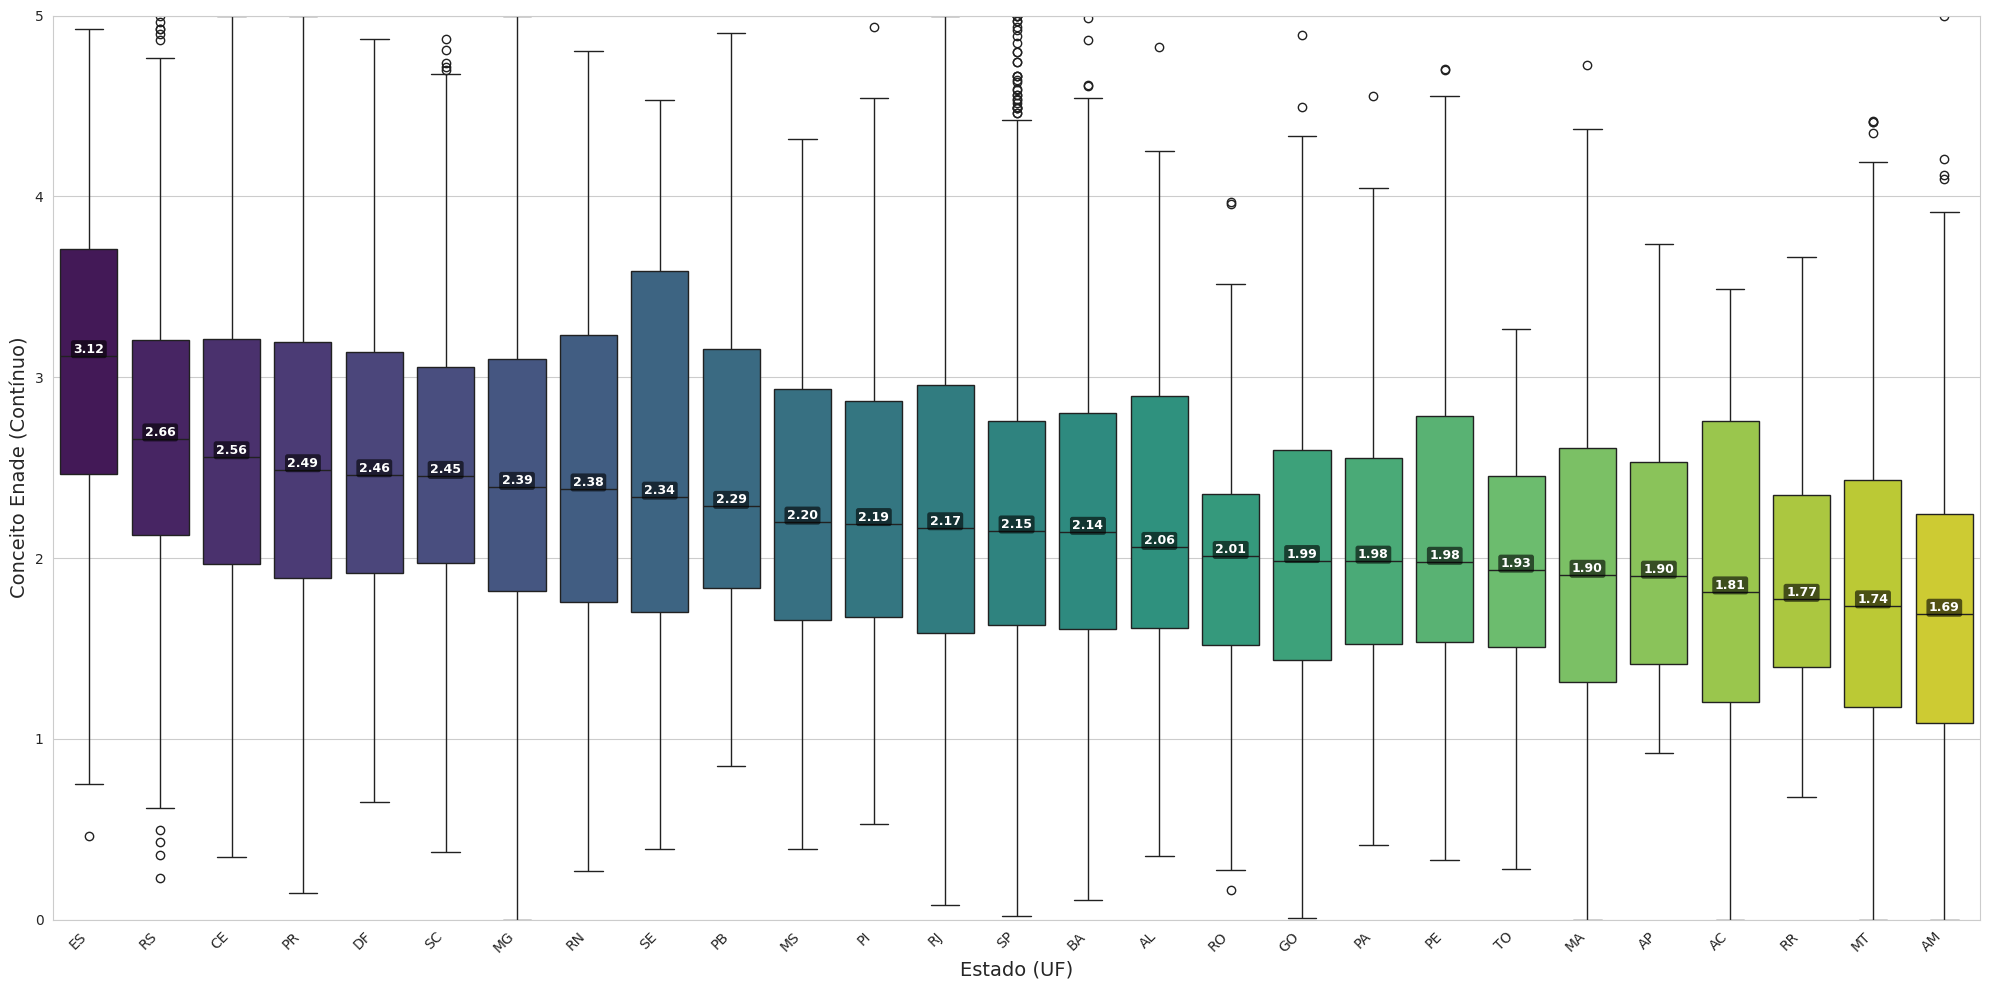

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. LIMPEZA E PREPARAÇÃO DOS DADOS ---
# Para evitar erros, limpamos a coluna da UF e a guardamos em uma nova coluna 'UF'
dfc['UF'] = dfc['Sigla da UF** '].str.strip()

# Agora, usamos a coluna limpa 'UF' para todo o resto.
# Calculamos a mediana por estado para definir a ordem do gráfico
ordem_estados = dfc.groupby('UF')['Conceito Enade (Contínuo)'].median().sort_values(ascending=False).index

# Calculamos as medianas na ordem correta para usar nos rótulos
medianas = dfc.groupby('UF')['Conceito Enade (Contínuo)'].median().loc[ordem_estados]

# --- 2. CRIAÇÃO DO GRÁFICO ---
# Criamos a figura, aumentando o tamanho para caber todos os estados
plt.figure(figsize=(20, 10))

# Criamos o Boxplot com os estados ordenados e capturamos em 'ax'
ax = sns.boxplot(
    data=dfc,
    x='UF', # Usamos a coluna limpa
    y='Conceito Enade (Contínuo)',
    order=ordem_estados,  # Aplica a ordem que calculamos
    palette='viridis'
)

# --- 3. ADIÇÃO DOS VALORES DA MEDIANA ---
# Usamos o mesmo loop do primeiro exemplo de boxplot
for i, med in enumerate(medianas):
    ax.text(i, med, f'{med:.2f}',
            ha='center',
            va='bottom',
            fontsize=9, # Fonte menor para não poluir o gráfico
            fontweight='bold',
            color='white',
            bbox=dict(facecolor='black', alpha=0.6, boxstyle='round,pad=0.2', edgecolor='none'))

# --- 4. MELHORIAS NO GRÁFICO ---
plt.xlabel('Estado (UF)', fontsize=14)
plt.ylabel('Conceito Enade (Contínuo)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes dos estados
plt.ylim(0, 5) # Garante a escala de 0 a 5
plt.tight_layout()
plt.show()

In [ ]:
# --- Bloco de Correção Imediata ---
print("Colunas antes da correção:", list(dfc.columns))

# Remove colunas duplicadas, mantendo a primeira ocorrência
dfc = dfc.loc[:, ~dfc.columns.duplicated(keep='first')]

print("Colunas após a remoção de duplicatas:", list(dfc.columns))

# Bloco de limpeza seguro para garantir que tudo está padronizado
rename_map = {
    'Sigla da UF**': 'UF',
    'Nº de Concluintes Inscritos': 'Inscritos',
    'Nº  de Concluintes Participantes': 'Participantes',
    'Nº de Concluintes Participantes': 'Participantes',
    'Tipo de Instituição': 'Tipo_Instituicao'
}

for old_name, new_name in rename_map.items():
    if old_name in dfc.columns and new_name not in dfc.columns:
        dfc.rename(columns={old_name: new_name}, inplace=True)

print("DataFrame corrigido e pronto para uso.")

Colunas antes da correção: ['Ano', 'Área de Avaliação', 'Grau Acadêmico', 'Nome da IES*', 'Organização Acadêmica', 'Categoria Administrativa', 'Modalidade de Ensino', 'Município do Curso**', 'Sigla da UF** ', 'Nº de Concluintes Inscritos', 'Nº  de Concluintes Participantes', 'Nota Padronizada - FG', 'Nota Padronizada - CE', 'Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)', 'Entidade Beneficiente de Assistência Social (CEBAS)', 'Tipo de Instituição', 'Região', 'UF']
Colunas após a remoção de duplicatas: ['Ano', 'Área de Avaliação', 'Grau Acadêmico', 'Nome da IES*', 'Organização Acadêmica', 'Categoria Administrativa', 'Modalidade de Ensino', 'Município do Curso**', 'Sigla da UF** ', 'Nº de Concluintes Inscritos', 'Nº  de Concluintes Participantes', 'Nota Padronizada - FG', 'Nota Padronizada - CE', 'Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)', 'Entidade Beneficiente de Assistência Social (CEBAS)', 'Tipo de Instituição', 'Região', 'UF']
DataFrame corrigido e pronto para uso.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("Iniciando Análise Final: Comparativo entre Estados-Chave")
print("="*60)

# --- Bloco de Limpeza Robusto e Aprimorado ---
# Este bloco pode ser executado várias vezes sem causar erros de colunas duplicadas.

dfc.columns = dfc.columns.str.strip() # 1. Remove espaços extras

# 2. Dicionário com os nomes que queremos renomear
rename_map = {
    'Sigla da UF**': 'UF',
    'Nº de Concluintes Inscritos': 'Inscritos',
    'Nº  de Concluintes Participantes': 'Participantes', # Com espaço duplo
    'Nº de Concluintes Participantes': 'Participantes',  # Com espaço simples
    'Tipo de Instituição': 'Tipo_Instituicao'
}

# 3. Renomeia as colunas de forma segura
for old_name, new_name in rename_map.items():
    if old_name in dfc.columns and new_name not in dfc.columns:
        dfc.rename(columns={old_name: new_name}, inplace=True)

print("Colunas do DataFrame limpas e padronizadas de forma segura.")
# -------------------------------------------------------------

# --- PRÉ-REQUISITOS: Recalculando os DataFrames necessários ---
media_por_uf_series = dfc.groupby('UF')['Conceito Enade (Contínuo)'].mean()
df_media = media_por_uf_series.reset_index(name='Média do Conceito')

participantes_por_uf_series = dfc.groupby('UF')['Participantes'].sum()
df_participantes = participantes_por_uf_series.reset_index(name='Total de Participantes')

dfc['Ausentes'] = dfc['Inscritos'] - dfc['Participantes']
abstencao_agg = dfc.groupby('UF').agg(
    Total_Inscritos=('Inscritos', 'sum'),
    Total_Ausentes=('Ausentes', 'sum')
).reset_index()
abstencao_agg['Taxa de Abstenção (%)'] = (abstencao_agg['Total_Ausentes'] / abstencao_agg['Total_Inscritos']) * 100
abstencao_por_uf = abstencao_agg[['UF', 'Taxa de Abstenção (%)']]

print("DataFrames de pré-requisito calculados com sucesso.")
# ----------------------------------------------------------------

# O restante do seu script de análise continua aqui...
# (O código para os PASSOS 1, 2, 3 e 4 permanece o mesmo)


Iniciando Análise Final: Comparativo entre Estados-Chave
Colunas do DataFrame limpas e padronizadas de forma segura.
DataFrames de pré-requisito calculados com sucesso.



Iniciando Análise Final: Comparativo entre Estados-Chave
Colunas do DataFrame limpas e padronizadas de forma segura.
DataFrames de pré-requisito calculados com sucesso.

Estado com Maior Média: ES (Média: 3.09)
Estado com Menor Média: AM (Média: 1.84)
Estado com Maior Volume: SP (Média: 2.25)

--- Tabela Comparativa Geral ---
    Total de Participantes  Média do Conceito  Taxa de Abstenção (%)
UF                                                                  
AM                    5885           1.844098              21.059691
ES                    4970           3.092749               9.057640
SP                   85572           2.247153              16.619246

--- Composição das Instituições (Pública vs. Privada) nos Estados-Chave ---
Tipo_Instituicao  % Pública  % Privada
UF                                    
AM                33.846154  66.153846
ES                23.834197  76.165803
SP                 8.814103  91.185897


/tmp/ipython-input-1473068021.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comparativo.index, y=df_comparativo['Média do Conceito'], ax=axes[0], palette='viridis')
/tmp/ipython-input-1473068021.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comparativo.index, y=df_comparativo['Taxa de Abstenção (%)'], ax=axes[1], palette='coolwarm')


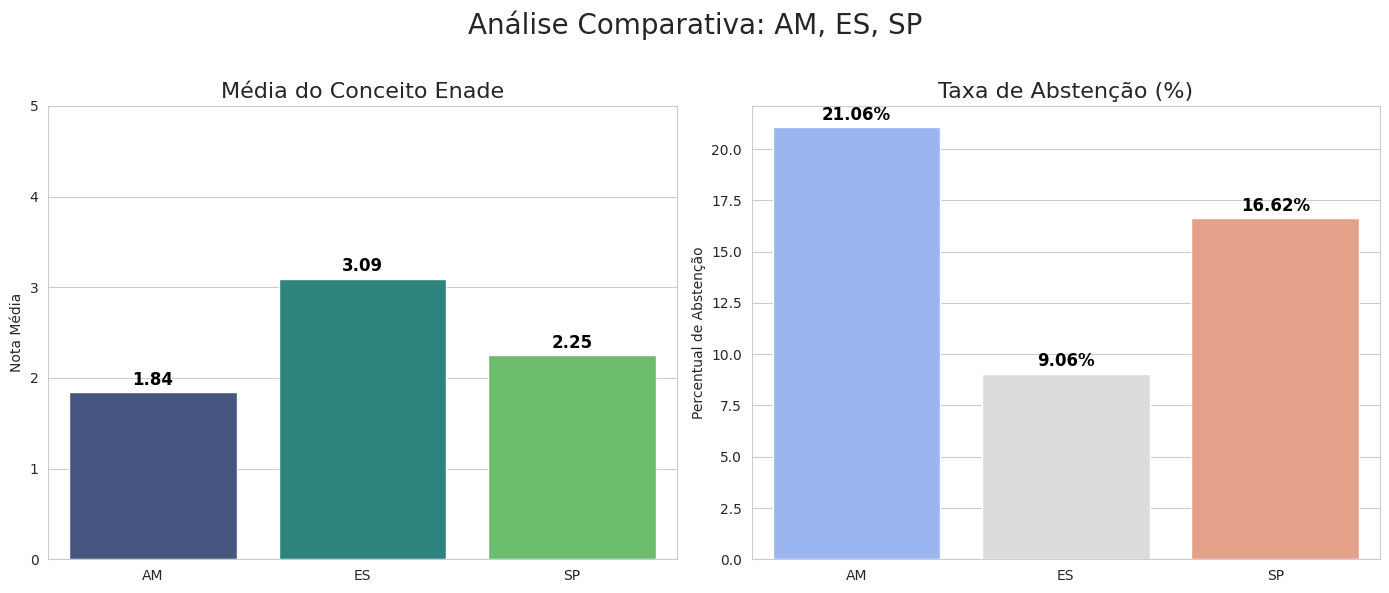

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("Iniciando Análise Final: Comparativo entre Estados-Chave")
print("="*60)

# --- Bloco de Limpeza Robusto e Aprimorado ---
# Este bloco pode ser executado várias vezes sem causar erros de colunas duplicadas.

dfc.columns = dfc.columns.str.strip() # 1. Remove espaços extras dos nomes das colunas

# 2. Dicionário com os nomes que queremos renomear
rename_map = {
    'Sigla da UF**': 'UF',
    'Nº de Concluintes Inscritos': 'Inscritos',
    'Nº  de Concluintes Participantes': 'Participantes', # Com espaço duplo
    'Nº de Concluintes Participantes': 'Participantes',  # Com espaço simples
    'Tipo de Instituição': 'Tipo_Instituicao'
}

# 3. Renomeia as colunas de forma segura
for old_name, new_name in rename_map.items():
    # Só renomeia se a coluna original existir E a nova coluna ainda NÃO existir
    if old_name in dfc.columns and new_name not in dfc.columns:
        dfc.rename(columns={old_name: new_name}, inplace=True)

print("Colunas do DataFrame limpas e padronizadas de forma segura.")
# -------------------------------------------------------------


# --- PRÉ-REQUISITOS: Recalculando os DataFrames necessários ---
media_por_uf_series = dfc.groupby('UF')['Conceito Enade (Contínuo)'].mean()
df_media = media_por_uf_series.reset_index(name='Média do Conceito')

participantes_por_uf_series = dfc.groupby('UF')['Participantes'].sum()
df_participantes = participantes_por_uf_series.reset_index(name='Total de Participantes')

dfc['Ausentes'] = dfc['Inscritos'] - dfc['Participantes']
abstencao_agg = dfc.groupby('UF').agg(
    Total_Inscritos=('Inscritos', 'sum'),
    Total_Ausentes=('Ausentes', 'sum')
).reset_index()
abstencao_agg['Taxa de Abstenção (%)'] = (abstencao_agg['Total_Ausentes'] / abstencao_agg['Total_Inscritos']) * 100
abstencao_por_uf = abstencao_agg[['UF', 'Taxa de Abstenção (%)']]

print("DataFrames de pré-requisito calculados com sucesso.")
# ----------------------------------------------------------------

# PASSO 1: Identificar os estados-chave de forma DINÂMICA
media_por_uf = df_media.set_index('UF').sort_values(by='Média do Conceito', ascending=False)

estado_maior_media = media_por_uf.index[0]
estado_menor_media = media_por_uf.index[-1]
estado_maior_volume = df_participantes.loc[df_participantes['Total de Participantes'].idxmax()]['UF']

print(f"\nEstado com Maior Média: {estado_maior_media} (Média: {media_por_uf.loc[estado_maior_media].values[0]:.2f})")
print(f"Estado com Menor Média: {estado_menor_media} (Média: {media_por_uf.loc[estado_menor_media].values[0]:.2f})")
print(f"Estado com Maior Volume: {estado_maior_volume} (Média: {media_por_uf.loc[estado_maior_volume].values[0]:.2f})")

estados_chave = list(set([estado_maior_media, estado_menor_media, estado_maior_volume]))


# PASSO 2: Criar um DataFrame de resumo com todas as métricas
df_analise_uf = pd.merge(df_participantes, df_media, on='UF')
df_analise_uf = pd.merge(df_analise_uf, abstencao_por_uf, on='UF')
df_comparativo = df_analise_uf[df_analise_uf['UF'].isin(estados_chave)].set_index('UF')

print("\n--- Tabela Comparativa Geral ---")
print(df_comparativo)


# PASSO 3: Análise da composição (Pública vs. Privada) dentro desses estados
df_composicao = dfc[dfc['UF'].isin(estados_chave)]
contagem_tipo_instituicao = df_composicao.groupby(['UF', 'Tipo_Instituicao']).size().unstack(fill_value=0)

contagem_tipo_instituicao = contagem_tipo_instituicao.reindex(columns=['Pública', 'Privada'], fill_value=0)

contagem_tipo_instituicao['Total'] = contagem_tipo_instituicao['Pública'] + contagem_tipo_instituicao['Privada']
contagem_tipo_instituicao['% Pública'] = (contagem_tipo_instituicao['Pública'] / contagem_tipo_instituicao['Total']) * 100
contagem_tipo_instituicao['% Privada'] = (contagem_tipo_instituicao['Privada'] / contagem_tipo_instituicao['Total']) * 100

print("\n--- Composição das Instituições (Pública vs. Privada) nos Estados-Chave ---")
print(contagem_tipo_instituicao[['% Pública', '% Privada']])


# PASSO 4: Visualização Comparativa Direta
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_comparativo.index, y=df_comparativo['Média do Conceito'], ax=axes[0], palette='viridis')
axes[0].set_title('Média do Conceito Enade', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Nota Média')
axes[0].set_ylim(0, 5)

sns.barplot(x=df_comparativo.index, y=df_comparativo['Taxa de Abstenção (%)'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Taxa de Abstenção (%)', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('Percentual de Abstenção')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black', fontweight='bold')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black', fontweight='bold')

fig.suptitle(f'Análise Comparativa: {", ".join(sorted(estados_chave))}', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Iniciando Análise Final: Comparativo entre Estados-Chave
Colunas do DataFrame limpas e padronizadas.
DataFrames de pré-requisito calculados com sucesso.

Estado com Maior Média: ES (Média: 3.09)
Estado com Menor Média: AM (Média: 1.84)
Estado com Maior Volume: SP (Média: 2.25)

--- Tabela Comparativa Geral ---
    Total de Participantes  Média do Conceito  Taxa de Abstenção (%)
UF                                                                  
AM                    5885           1.844098              21.059691
ES                    4970           3.092749               9.057640
SP                   85572           2.247153              16.619246

--- Composição das Instituições (Pública vs. Privada) nos Estados-Chave ---
Tipo_Instituicao  % Pública  % Privada
UF                                    
AM                33.846154  66.153846
ES                23.834197  76.165803
SP                 8.814103  91.185897


/tmp/ipython-input-2591171392.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comparativo.index, y=df_comparativo['Média do Conceito'], ax=axes[0], palette='viridis')
/tmp/ipython-input-2591171392.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comparativo.index, y=df_comparativo['Taxa de Abstenção (%)'], ax=axes[1], palette='coolwarm')


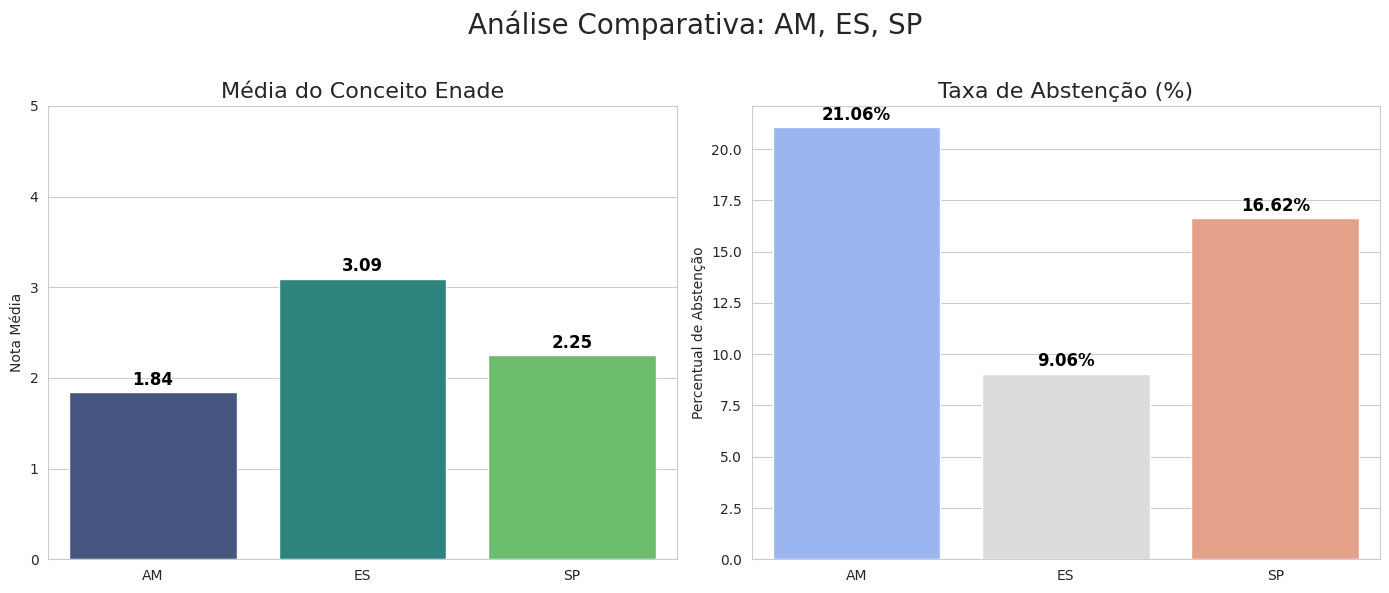

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("Iniciando Análise Final: Comparativo entre Estados-Chave")
print("="*60)

# --- Bloco de Limpeza Centralizado (Boa Prática) ---
dfc.columns = dfc.columns.str.strip()
# CORREÇÃO: Ajustando o nome da coluna para incluir o provável espaço duplo
dfc.rename(columns={
    'Sigla da UF**':'UF',
    'Nº de Concluintes Inscritos': 'Inscritos',
    'Nº  de Concluintes Participantes': 'Participantes', # <-- Nome corrigido com espaço duplo
    'Tipo de Instituição': 'Tipo_Instituicao'
}, inplace=True)
print("Colunas do DataFrame limpas e padronizadas.")
# -------------------------------------------------------------

# --- PRÉ-REQUISITOS: Recalculando os DataFrames necessários ---
media_por_uf_series = dfc.groupby('UF')['Conceito Enade (Contínuo)'].mean()
df_media = media_por_uf_series.reset_index(name='Média do Conceito')

participantes_por_uf_series = dfc.groupby('UF')['Participantes'].sum()
df_participantes = participantes_por_uf_series.reset_index(name='Total de Participantes')

dfc['Ausentes'] = dfc['Inscritos'] - dfc['Participantes']
abstencao_agg = dfc.groupby('UF').agg(
    Total_Inscritos=('Inscritos', 'sum'),
    Total_Ausentes=('Ausentes', 'sum')
).reset_index()
abstencao_agg['Taxa de Abstenção (%)'] = (abstencao_agg['Total_Ausentes'] / abstencao_agg['Total_Inscritos']) * 100
abstencao_por_uf = abstencao_agg[['UF', 'Taxa de Abstenção (%)']]

print("DataFrames de pré-requisito calculados com sucesso.")
# ----------------------------------------------------------------

# PASSO 1: Identificar os estados-chave de forma DINÂMICA
media_por_uf = df_media.set_index('UF').sort_values(by='Média do Conceito', ascending=False)

estado_maior_media = media_por_uf.index[0]
estado_menor_media = media_por_uf.index[-1]
estado_maior_volume = df_participantes.loc[df_participantes['Total de Participantes'].idxmax()]['UF']

print(f"\nEstado com Maior Média: {estado_maior_media} (Média: {media_por_uf.loc[estado_maior_media].values[0]:.2f})")
print(f"Estado com Menor Média: {estado_menor_media} (Média: {media_por_uf.loc[estado_menor_media].values[0]:.2f})")
print(f"Estado com Maior Volume: {estado_maior_volume} (Média: {media_por_uf.loc[estado_maior_volume].values[0]:.2f})")

estados_chave = list(set([estado_maior_media, estado_menor_media, estado_maior_volume]))


# PASSO 2: Criar um DataFrame de resumo com todas as métricas
df_analise_uf = pd.merge(df_participantes, df_media, on='UF')
df_analise_uf = pd.merge(df_analise_uf, abstencao_por_uf, on='UF')
df_comparativo = df_analise_uf[df_analise_uf['UF'].isin(estados_chave)].set_index('UF')

print("\n--- Tabela Comparativa Geral ---")
print(df_comparativo)


# PASSO 3: Análise da composição (Pública vs. Privada) dentro desses estados
df_composicao = dfc[dfc['UF'].isin(estados_chave)]
contagem_tipo_instituicao = df_composicao.groupby(['UF', 'Tipo_Instituicao']).size().unstack(fill_value=0)

contagem_tipo_instituicao = contagem_tipo_instituicao.reindex(columns=['Pública', 'Privada'], fill_value=0)

contagem_tipo_instituicao['Total'] = contagem_tipo_instituicao['Pública'] + contagem_tipo_instituicao['Privada']
contagem_tipo_instituicao['% Pública'] = (contagem_tipo_instituicao['Pública'] / contagem_tipo_instituicao['Total']) * 100
contagem_tipo_instituicao['% Privada'] = (contagem_tipo_instituicao['Privada'] / contagem_tipo_instituicao['Total']) * 100

print("\n--- Composição das Instituições (Pública vs. Privada) nos Estados-Chave ---")
print(contagem_tipo_instituicao[['% Pública', '% Privada']])


# PASSO 4: Visualização Comparativa Direta
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_comparativo.index, y=df_comparativo['Média do Conceito'], ax=axes[0], palette='viridis')
axes[0].set_title('Média do Conceito Enade', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Nota Média')
axes[0].set_ylim(0, 5)

sns.barplot(x=df_comparativo.index, y=df_comparativo['Taxa de Abstenção (%)'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Taxa de Abstenção (%)', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('Percentual de Abstenção')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black', fontweight='bold')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black', fontweight='bold')

fig.suptitle(f'Análise Comparativa: {", ".join(sorted(estados_chave))}', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Iniciando Análise Final: Comparativo entre Estados-Chave
Colunas do DataFrame limpas e padronizadas.
DataFrames de pré-requisito calculados com sucesso.

Estado com Maior Média: ES (Média: 3.09)
Estado com Menor Média: AM (Média: 1.84)
Estado com Maior Volume: SP (Média: 2.25)

--- Tabela Comparativa Geral ---
    Total de Participantes  Média do Conceito  Taxa de Abstenção (%)
UF                                                                  
AM                    5885           1.844098              21.059691
ES                    4970           3.092749               9.057640
SP                   85572           2.247153              16.619246

--- Composição das Instituições (Pública vs. Privada) nos Estados-Chave ---
Tipo_Instituicao  % Pública  % Privada
UF                                    
AM                33.846154  66.153846
ES                23.834197  76.165803
SP                 8.814103  91.185897


/tmp/ipython-input-4049468096.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comparativo.index, y=df_comparativo['Média do Conceito'], ax=axes[0], palette='viridis')
/tmp/ipython-input-4049468096.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comparativo.index, y=df_comparativo['Taxa de Abstenção (%)'], ax=axes[1], palette='coolwarm')


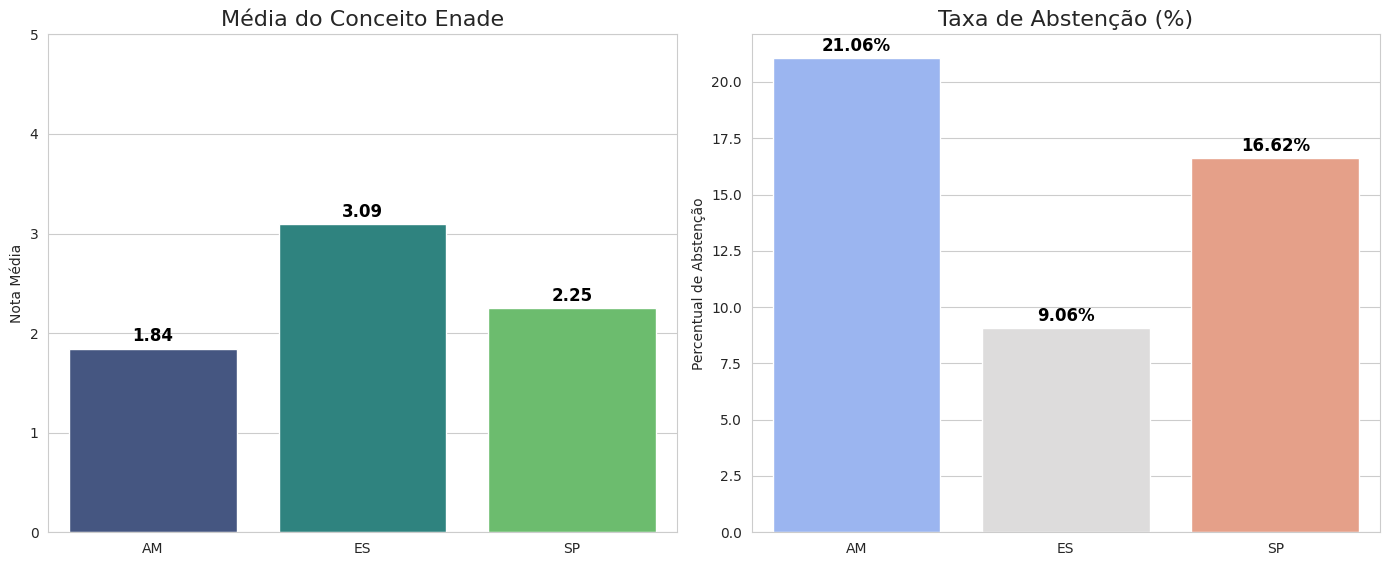

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("Iniciando Análise Final: Comparativo entre Estados-Chave")
print("="*60)

# --- Bloco de Limpeza Centralizado (Boa Prática) ---
dfc.columns = dfc.columns.str.strip()
# CORREÇÃO: Ajustando o nome da coluna para incluir o provável espaço duplo
dfc.rename(columns={
    'Sigla da UF**': 'UF',
    'Nº de Concluintes Inscritos': 'Inscritos',
    'Nº  de Concluintes Participantes': 'Participantes', # <-- Nome corrigido com espaço duplo
    'Tipo de Instituição': 'Tipo_Instituicao'
}, inplace=True)
print("Colunas do DataFrame limpas e padronizadas.")
# -------------------------------------------------------------

# --- PRÉ-REQUISITOS: Recalculando os DataFrames necessários ---
media_por_uf_series = dfc.groupby('UF')['Conceito Enade (Contínuo)'].mean()
df_media = media_por_uf_series.reset_index(name='Média do Conceito')

participantes_por_uf_series = dfc.groupby('UF')['Participantes'].sum()
df_participantes = participantes_por_uf_series.reset_index(name='Total de Participantes')

dfc['Ausentes'] = dfc['Inscritos'] - dfc['Participantes']
abstencao_agg = dfc.groupby('UF').agg(
    Total_Inscritos=('Inscritos', 'sum'),
    Total_Ausentes=('Ausentes', 'sum')
).reset_index()
abstencao_agg['Taxa de Abstenção (%)'] = (abstencao_agg['Total_Ausentes'] / abstencao_agg['Total_Inscritos']) * 100
abstencao_por_uf = abstencao_agg[['UF', 'Taxa de Abstenção (%)']]

print("DataFrames de pré-requisito calculados com sucesso.")
# ----------------------------------------------------------------

# PASSO 1: Identificar os estados-chave de forma DINÂMICA
media_por_uf = df_media.set_index('UF').sort_values(by='Média do Conceito', ascending=False)

estado_maior_media = media_por_uf.index[0]
estado_menor_media = media_por_uf.index[-1]
estado_maior_volume = df_participantes.loc[df_participantes['Total de Participantes'].idxmax()]['UF']

print(f"\nEstado com Maior Média: {estado_maior_media} (Média: {media_por_uf.loc[estado_maior_media].values[0]:.2f})")
print(f"Estado com Menor Média: {estado_menor_media} (Média: {media_por_uf.loc[estado_menor_media].values[0]:.2f})")
print(f"Estado com Maior Volume: {estado_maior_volume} (Média: {media_por_uf.loc[estado_maior_volume].values[0]:.2f})")

estados_chave = list(set([estado_maior_media, estado_menor_media, estado_maior_volume]))


# PASSO 2: Criar um DataFrame de resumo com todas as métricas
df_analise_uf = pd.merge(df_participantes, df_media, on='UF')
df_analise_uf = pd.merge(df_analise_uf, abstencao_por_uf, on='UF')
df_comparativo = df_analise_uf[df_analise_uf['UF'].isin(estados_chave)].set_index('UF')

print("\n--- Tabela Comparativa Geral ---")
print(df_comparativo)


# PASSO 3: Análise da composição (Pública vs. Privada) dentro desses estados
df_composicao = dfc[dfc['UF'].isin(estados_chave)]
contagem_tipo_instituicao = df_composicao.groupby(['UF', 'Tipo_Instituicao']).size().unstack(fill_value=0)

contagem_tipo_instituicao = contagem_tipo_instituicao.reindex(columns=['Pública', 'Privada'], fill_value=0)

contagem_tipo_instituicao['Total'] = contagem_tipo_instituicao['Pública'] + contagem_tipo_instituicao['Privada']
contagem_tipo_instituicao['% Pública'] = (contagem_tipo_instituicao['Pública'] / contagem_tipo_instituicao['Total']) * 100
contagem_tipo_instituicao['% Privada'] = (contagem_tipo_instituicao['Privada'] / contagem_tipo_instituicao['Total']) * 100

print("\n--- Composição das Instituições (Pública vs. Privada) nos Estados-Chave ---")
print(contagem_tipo_instituicao[['% Pública', '% Privada']])


# PASSO 4: Visualização Comparativa Direta
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_comparativo.index, y=df_comparativo['Média do Conceito'], ax=axes[0], palette='viridis')
axes[0].set_title('Média do Conceito Enade', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Nota Média')
axes[0].set_ylim(0, 5)

sns.barplot(x=df_comparativo.index, y=df_comparativo['Taxa de Abstenção (%)'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Taxa de Abstenção (%)', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('Percentual de Abstenção')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black', fontweight='bold')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black', fontweight='bold')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Iniciando limpeza e preparação dos dados...
Dados limpos e convertidos.
Agregação de dados por estado concluída.

Exibindo Gráfico 1: Média do Conceito Enade por Estado...


/tmp/ipython-input-1915030899.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


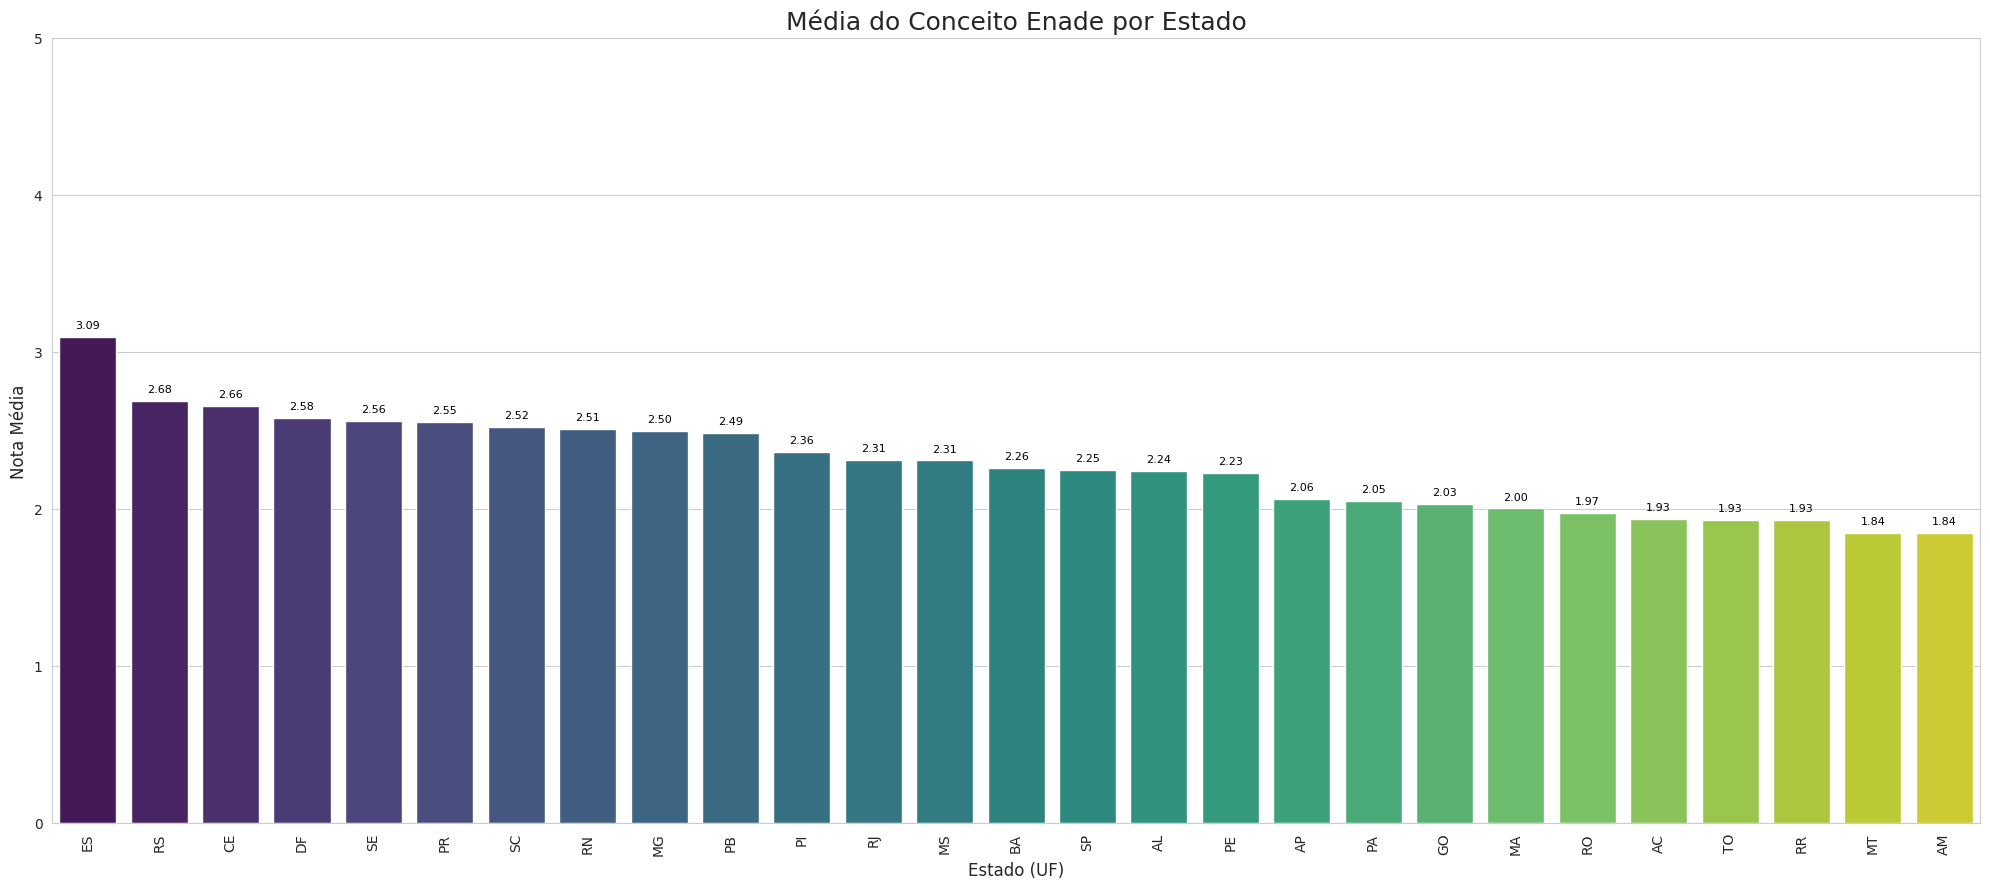


Exibindo Gráfico 2: Taxa de Abstenção (%) por Estado...


/tmp/ipython-input-1915030899.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


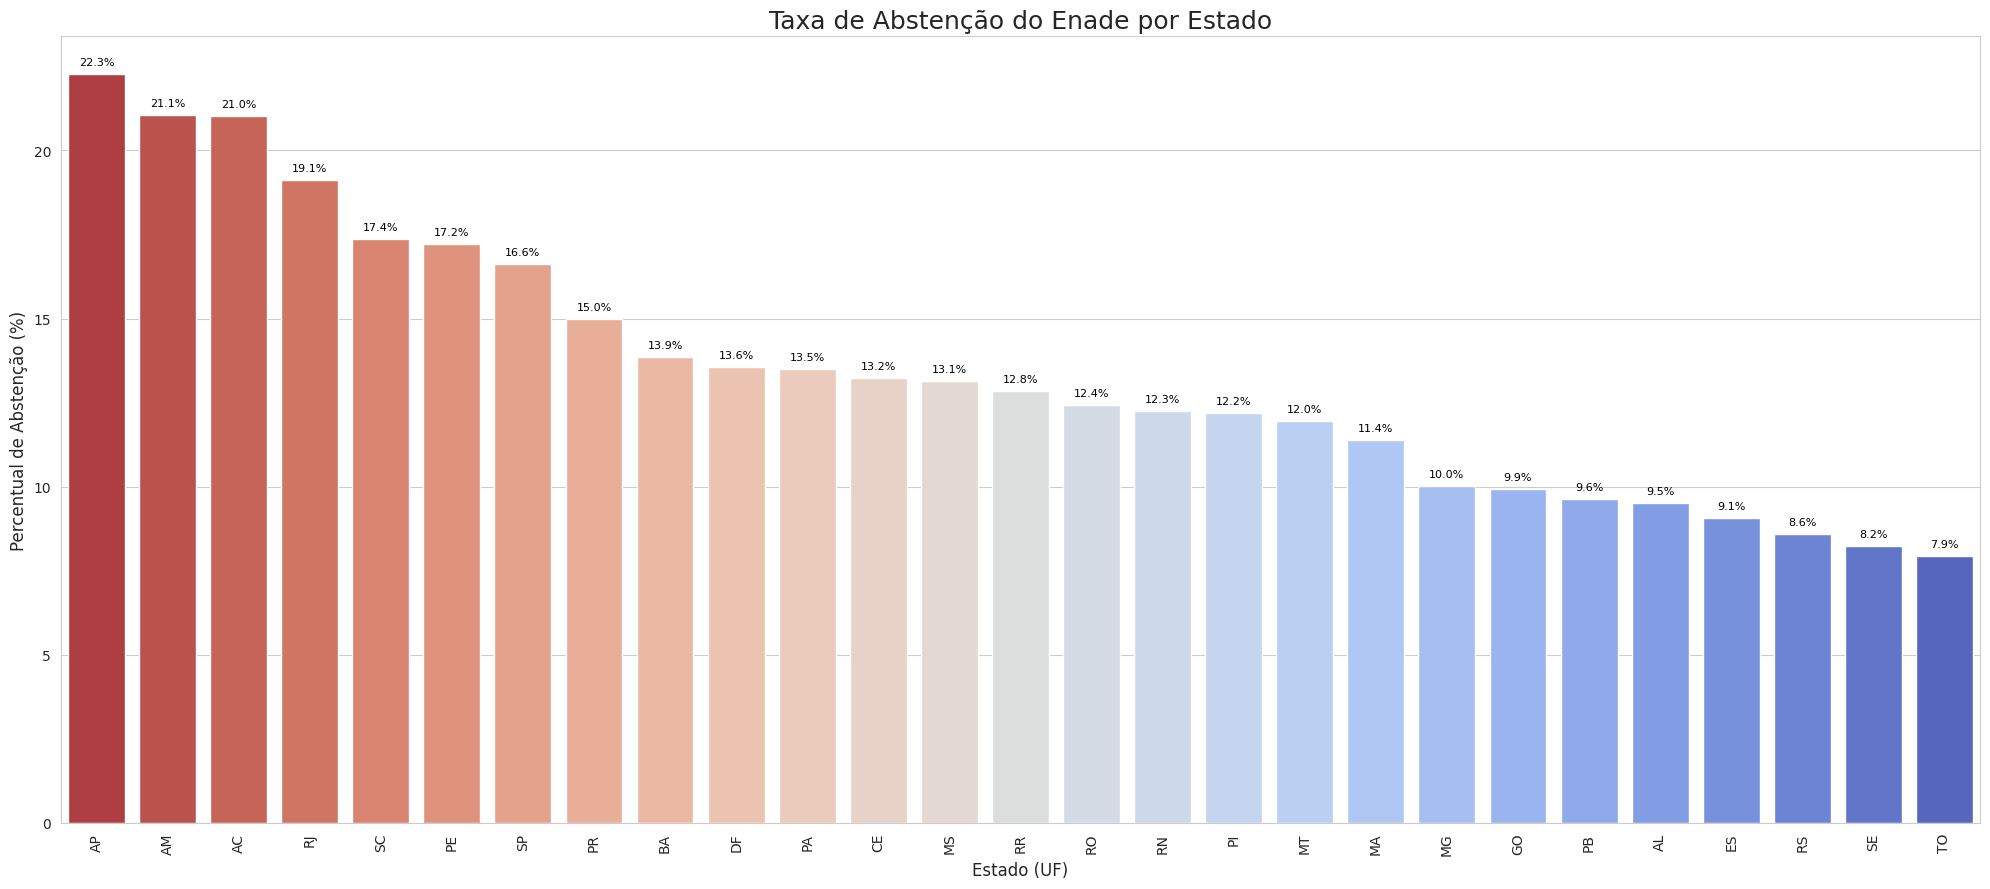

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# --- 1. Bloco de Limpeza e Preparação Centralizado ---
# ==============================================================================
print("Iniciando limpeza e preparação dos dados...")

# Renomeia as colunas para nomes simples e confiáveis
dfc.columns = dfc.columns.str.strip()
dfc.rename(columns={
    'Sigla da UF**': 'UF',
    'Nº de Concluintes Inscritos': 'Inscritos',
    'Nº  de Concluintes Participantes': 'Participantes', # Corrigido para espaço duplo
    'Nº de Concluintes Participantes': 'Participantes'  # Garantia para espaço simples
}, inplace=True)

# Garante que as colunas numéricas são, de fato, numéricas, tratando erros
numeric_cols = ['Inscritos', 'Participantes', 'Conceito Enade (Contínuo)']
for col in numeric_cols:
    if col in dfc.columns:
        dfc[col] = pd.to_numeric(dfc[col], errors='coerce')

print("Dados limpos e convertidos.")

# ==============================================================================
# --- 2. Agregação de Dados Otimizada (tudo em um groupby) ---
# ==============================================================================
# Em vez de vários groupbys, fazemos um único mais eficiente

# Primeiro, calculamos os ausentes
dfc['Ausentes'] = dfc['Inscritos'] - dfc['Participantes']

# Agregamos todas as métricas necessárias de uma vez
df_analise_uf = dfc.groupby('UF').agg(
    Media_Conceito=('Conceito Enade (Contínuo)', 'mean'),
    Total_Inscritos=('Inscritos', 'sum'),
    Total_Ausentes=('Ausentes', 'sum')
).reset_index()

# Calculamos a taxa de abstenção com segurança (evitando divisão por zero)
df_analise_uf['Taxa de Abstenção (%)'] = 0.0
mask_inscritos = df_analise_uf['Total_Inscritos'] > 0
df_analise_uf.loc[mask_inscritos, 'Taxa de Abstenção (%)'] = \
    (df_analise_uf.loc[mask_inscritos, 'Total_Ausentes'] / df_analise_uf.loc[mask_inscritos, 'Total_Inscritos']) * 100

print("Agregação de dados por estado concluída.")

# ==============================================================================
# --- GRÁFICO 1: Média do Conceito Enade por Estado ---
# ==============================================================================
print("\nExibindo Gráfico 1: Média do Conceito Enade por Estado...")

# Ordenando os dados pela média do conceito para este gráfico
df_ordenado_media = df_analise_uf.sort_values(by='Media_Conceito', ascending=False)

plt.figure(figsize=(20, 9))
ax1 = sns.barplot(
    x='UF',
    y='Media_Conceito',
    data=df_ordenado_media,
    palette='viridis'
)

# Anotações
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points', fontsize=8, color='black')

# Títulos e rótulos
ax1.set_title('Média do Conceito Enade por Estado', fontsize=18)
ax1.set_xlabel('Estado (UF)', fontsize=12)
ax1.set_ylabel('Nota Média', fontsize=12)
ax1.set_ylim(0, 5)
ax1.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# ==============================================================================
# --- GRÁFICO 2: Taxa de Abstenção (%) por Estado ---
# ==============================================================================
print("\nExibindo Gráfico 2: Taxa de Abstenção (%) por Estado...")

# IMPORTANTE: Ordenando os dados pela taxa de abstenção para este gráfico
df_ordenado_abstencao = df_analise_uf.sort_values(by='Taxa de Abstenção (%)', ascending=False)

plt.figure(figsize=(20, 9))
ax2 = sns.barplot(
    x='UF',
    y='Taxa de Abstenção (%)',
    data=df_ordenado_abstencao,
    palette='coolwarm_r' # _r inverte a paleta de cores
)

# Anotações
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points', fontsize=8, color='black')

# Títulos e rótulos
ax2.set_title('Taxa de Abstenção do Enade por Estado', fontsize=18)
ax2.set_xlabel('Estado (UF)', fontsize=12)
ax2.set_ylabel('Percentual de Abstenção (%)', fontsize=12)
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


Iniciando Análise Final: Comparativo entre Estados-Chave
Colunas originais: ['Ano', 'Área de Avaliação', 'Grau Acadêmico', 'Nome da IES*', 'Organização Acadêmica', 'Categoria Administrativa', 'Modalidade de Ensino', 'Município do Curso**', 'UF', 'Inscritos', 'Participantes', 'Nota Padronizada - FG', 'Nota Padronizada - CE', 'Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)', 'Entidade Beneficiente de Assistência Social (CEBAS)', 'Tipo_Instituicao', 'Região', 'UF', 'Ausentes']
Colunas após a correção e padronização: ['Ano', 'Área de Avaliação', 'Grau Acadêmico', 'Nome da IES*', 'Organização Acadêmica', 'Categoria Administrativa', 'Modalidade de Ensino', 'Município do Curso**', 'UF', 'Inscritos', 'Participantes', 'Nota Padronizada - FG', 'Nota Padronizada - CE', 'Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)', 'Entidade Beneficiente de Assistência Social (CEBAS)', 'Tipo_Instituicao', 'Região', 'Ausentes']
DataFrames de pré-requisito calculados com sucesso.

Estado com Maior Méd

/tmp/ipython-input-992403804.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Ausentes'] = dfc['Inscritos'] - dfc['Participantes']
/tmp/ipython-input-992403804.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comparativo.index, y=df_comparativo['Média do Conceito'], ax=axes[0], palette='viridis')
/tmp/ipython-input-992403804.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comparativo.index, y=df_comparativo['Taxa de Absten

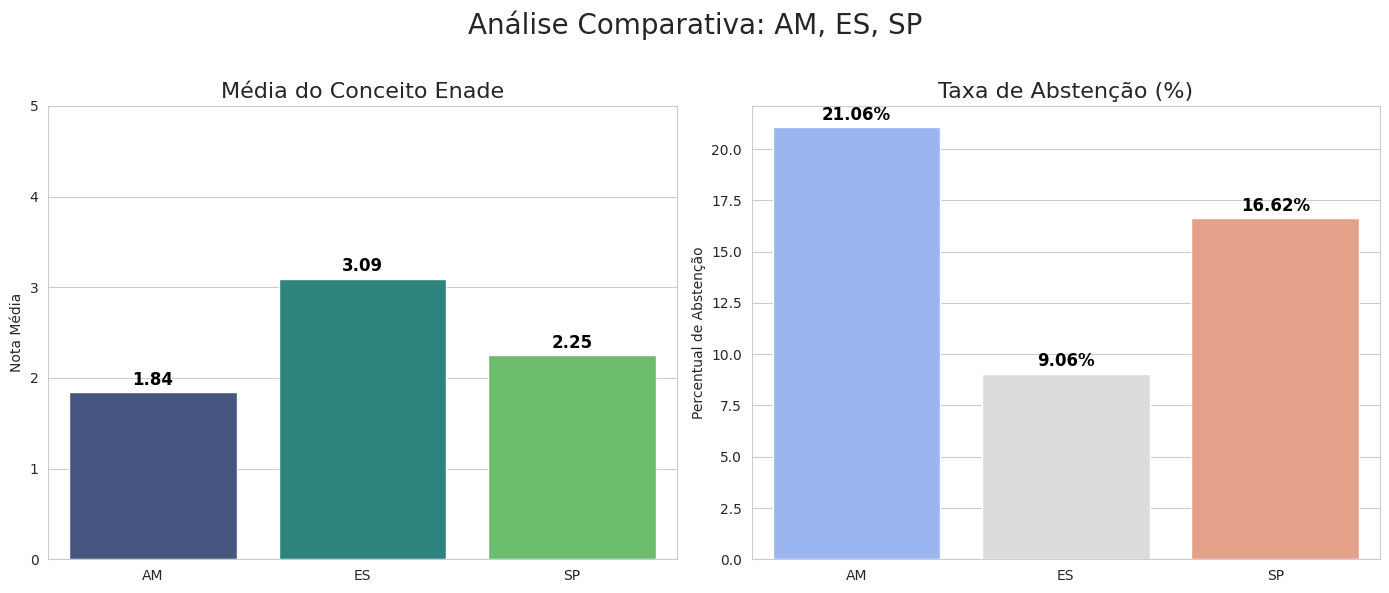

In [ ]:
print("\n" + "="*60)
print("Iniciando Análise Final: Comparativo entre Estados-Chave")
print("="*60)

# --- Bloco de Limpeza e Correção Definitivo ---
# Este bloco primeiro remove colunas duplicadas e depois renomeia de forma segura.

print("Colunas originais:", list(dfc.columns))

# 1. Remove quaisquer colunas duplicadas que possam ter sido criadas
dfc = dfc.loc[:, ~dfc.columns.duplicated(keep='first')]

# 2. Remove espaços extras dos nomes das colunas restantes
dfc.columns = dfc.columns.str.strip()

# 3. Dicionário com os nomes que queremos renomear
rename_map = {
    'Sigla da UF**': 'UF',
    'Nº de Concluintes Inscritos': 'Inscritos',
    'Nº  de Concluintes Participantes': 'Participantes', # Com espaço duplo
    'Nº de Concluintes Participantes': 'Participantes',  # Com espaço simples
    'Tipo de Instituição': 'Tipo_Instituicao'
}

# 4. Renomeia as colunas de forma segura, evitando criar novas duplicatas
for old_name, new_name in rename_map.items():
    if old_name in dfc.columns and new_name not in dfc.columns:
        dfc.rename(columns={old_name: new_name}, inplace=True)

print("Colunas após a correção e padronização:", list(dfc.columns))
# -------------------------------------------------------------


# --- PRÉ-REQUISITOS: Recalculando os DataFrames necessários ---
media_por_uf_series = dfc.groupby('UF')['Conceito Enade (Contínuo)'].mean()
df_media = media_por_uf_series.reset_index(name='Média do Conceito')

participantes_por_uf_series = dfc.groupby('UF')['Participantes'].sum()
df_participantes = participantes_por_uf_series.reset_index(name='Total de Participantes')

dfc['Ausentes'] = dfc['Inscritos'] - dfc['Participantes']
abstencao_agg = dfc.groupby('UF').agg(
    Total_Inscritos=('Inscritos', 'sum'),
    Total_Ausentes=('Ausentes', 'sum')
).reset_index()
abstencao_agg['Taxa de Abstenção (%)'] = (abstencao_agg['Total_Ausentes'] / abstencao_agg['Total_Inscritos']) * 100
abstencao_por_uf = abstencao_agg[['UF', 'Taxa de Abstenção (%)']]

print("DataFrames de pré-requisito calculados com sucesso.")
# ----------------------------------------------------------------

# PASSO 1: Identificar os estados-chave de forma DINÂMICA
media_por_uf = df_media.set_index('UF').sort_values(by='Média do Conceito', ascending=False)

estado_maior_media = media_por_uf.index[0]
estado_menor_media = media_por_uf.index[-1]
estado_maior_volume = df_participantes.loc[df_participantes['Total de Participantes'].idxmax()]['UF']

print(f"\nEstado com Maior Média: {estado_maior_media} (Média: {media_por_uf.loc[estado_maior_media].values[0]:.2f})")
print(f"Estado com Menor Média: {estado_menor_media} (Média: {media_por_uf.loc[estado_menor_media].values[0]:.2f})")
print(f"Estado com Maior Volume: {estado_maior_volume} (Média: {media_por_uf.loc[estado_maior_volume].values[0]:.2f})")

estados_chave = list(set([estado_maior_media, estado_menor_media, estado_maior_volume]))


# PASSO 2: Criar um DataFrame de resumo com todas as métricas
df_analise_uf = pd.merge(df_participantes, df_media, on='UF')
df_analise_uf = pd.merge(df_analise_uf, abstencao_por_uf, on='UF')
df_comparativo = df_analise_uf[df_analise_uf['UF'].isin(estados_chave)].set_index('UF')

print("\n--- Tabela Comparativa Geral ---")
print(df_comparativo)


# PASSO 3: Análise da composição (Pública vs. Privada) dentro desses estados
df_composicao = dfc[dfc['UF'].isin(estados_chave)]
contagem_tipo_instituicao = df_composicao.groupby(['UF', 'Tipo_Instituicao']).size().unstack(fill_value=0)

contagem_tipo_instituicao = contagem_tipo_instituicao.reindex(columns=['Pública', 'Privada'], fill_value=0)

contagem_tipo_instituicao['Total'] = contagem_tipo_instituicao['Pública'] + contagem_tipo_instituicao['Privada']
contagem_tipo_instituicao['% Pública'] = (contagem_tipo_instituicao['Pública'] / contagem_tipo_instituicao['Total']) * 100
contagem_tipo_instituicao['% Privada'] = (contagem_tipo_instituicao['Privada'] / contagem_tipo_instituicao['Total']) * 100

print("\n--- Composição das Instituições (Pública vs. Privada) nos Estados-Chave ---")
print(contagem_tipo_instituicao[['% Pública', '% Privada']])


# PASSO 4: Visualização Comparativa Direta
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_comparativo.index, y=df_comparativo['Média do Conceito'], ax=axes[0], palette='viridis')
axes[0].set_title('Média do Conceito Enade', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Nota Média')
axes[0].set_ylim(0, 5)

sns.barplot(x=df_comparativo.index, y=df_comparativo['Taxa de Abstenção (%)'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Taxa de Abstenção (%)', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('Percentual de Abstenção')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black', fontweight='bold')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black', fontweight='bold')

fig.suptitle(f'Análise Comparativa: {", ".join(sorted(estados_chave))}', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Iniciando limpeza e preparação dos dados...
Dados limpos e convertidos.
Agregação de dados por estado concluída.

Exibindo Gráfico 1: Média do Conceito Enade por Estado...


/tmp/ipython-input-2541871431.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


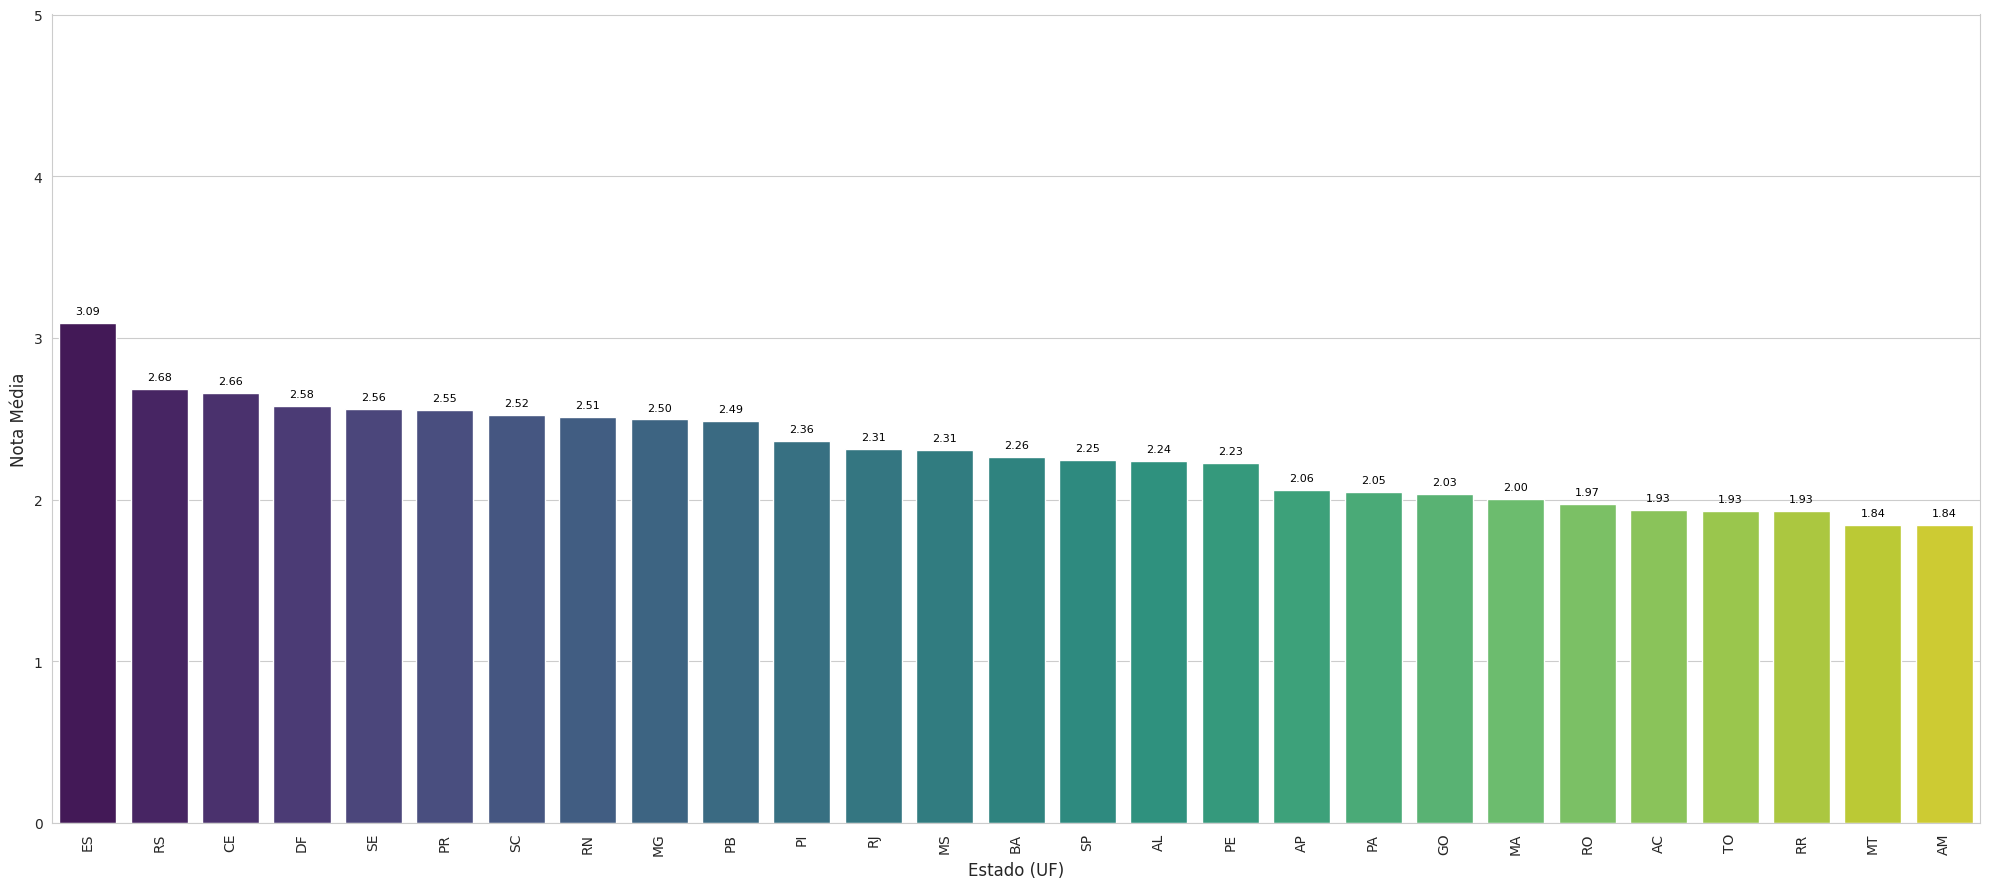


Exibindo Gráfico 2: Taxa de Abstenção (%) por Estado...


/tmp/ipython-input-2541871431.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


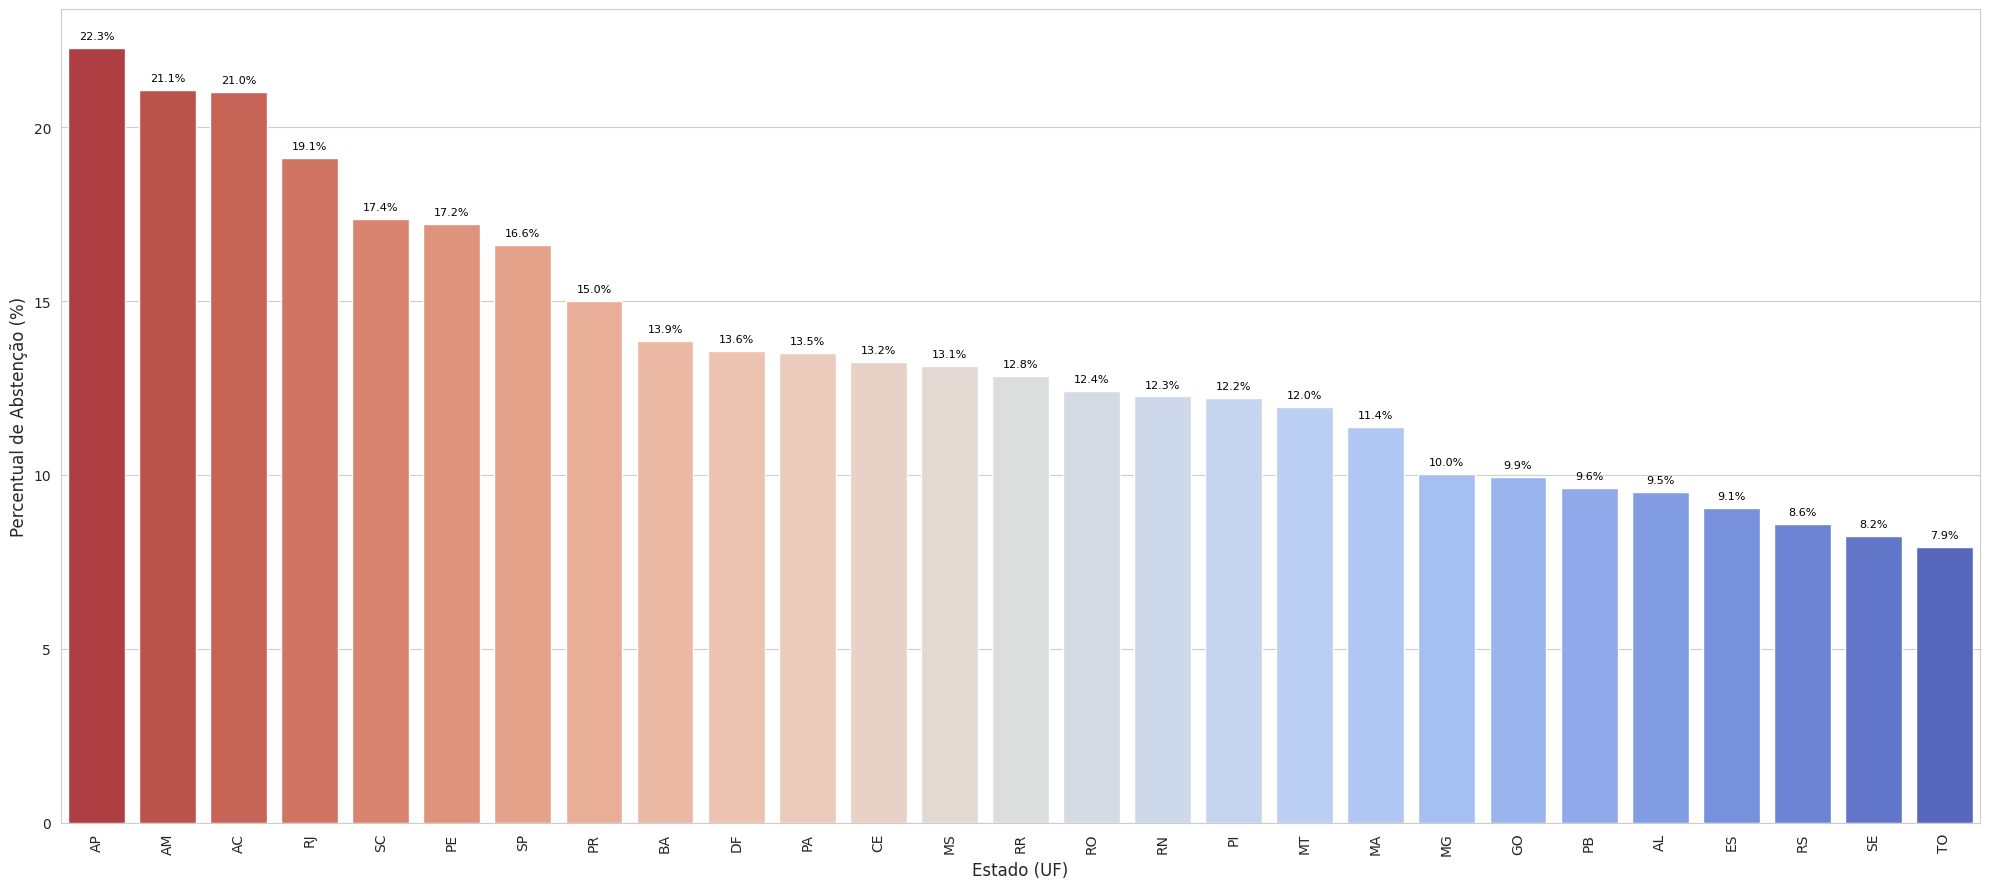

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# --- 1. Bloco de Limpeza e Preparação Centralizado ---
# ==============================================================================
print("Iniciando limpeza e preparação dos dados...")

# Renomeia as colunas para nomes simples e confiáveis
dfc.columns = dfc.columns.str.strip()
dfc.rename(columns={
    'Sigla da UF**': 'UF',
    'Nº de Concluintes Inscritos': 'Inscritos',
    'Nº  de Concluintes Participantes': 'Participantes', # Corrigido para espaço duplo
    'Nº de Concluintes Participantes': 'Participantes'  # Garantia para espaço simples
}, inplace=True)

# Garante que as colunas numéricas são, de fato, numéricas, tratando erros
numeric_cols = ['Inscritos', 'Participantes', 'Conceito Enade (Contínuo)']
for col in numeric_cols:
    if col in dfc.columns:
        dfc[col] = pd.to_numeric(dfc[col], errors='coerce')

print("Dados limpos e convertidos.")

# ==============================================================================
# --- 2. Agregação de Dados Otimizada (tudo em um groupby) ---
# ==============================================================================
# Em vez de vários groupbys, fazemos um único mais eficiente

# Primeiro, calculamos os ausentes
dfc['Ausentes'] = dfc['Inscritos'] - dfc['Participantes']

# Agregamos todas as métricas necessárias de uma vez
df_analise_uf = dfc.groupby('UF').agg(
    Media_Conceito=('Conceito Enade (Contínuo)', 'mean'),
    Total_Inscritos=('Inscritos', 'sum'),
    Total_Ausentes=('Ausentes', 'sum')
).reset_index()

# Calculamos a taxa de abstenção com segurança (evitando divisão por zero)
df_analise_uf['Taxa de Abstenção (%)'] = 0.0
mask_inscritos = df_analise_uf['Total_Inscritos'] > 0
df_analise_uf.loc[mask_inscritos, 'Taxa de Abstenção (%)'] = \
    (df_analise_uf.loc[mask_inscritos, 'Total_Ausentes'] / df_analise_uf.loc[mask_inscritos, 'Total_Inscritos']) * 100

print("Agregação de dados por estado concluída.")

# ==============================================================================
# --- GRÁFICO 1: Média do Conceito Enade por Estado ---
# ==============================================================================
print("\nExibindo Gráfico 1: Média do Conceito Enade por Estado...")

# Ordenando os dados pela média do conceito para este gráfico
df_ordenado_media = df_analise_uf.sort_values(by='Media_Conceito', ascending=False)

plt.figure(figsize=(20, 9))
ax1 = sns.barplot(
    x='UF',
    y='Media_Conceito',
    data=df_ordenado_media,
    palette='viridis'
)

# Anotações
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points', fontsize=8, color='black')

# Títulos e rótulos
ax1.set_xlabel('Estado (UF)', fontsize=12)
ax1.set_ylabel('Nota Média', fontsize=12)
ax1.set_ylim(0, 5)
ax1.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# ==============================================================================
# --- GRÁFICO 2: Taxa de Abstenção (%) por Estado ---
# ==============================================================================
print("\nExibindo Gráfico 2: Taxa de Abstenção (%) por Estado...")

# IMPORTANTE: Ordenando os dados pela taxa de abstenção para este gráfico
df_ordenado_abstencao = df_analise_uf.sort_values(by='Taxa de Abstenção (%)', ascending=False)

plt.figure(figsize=(20, 9))
ax2 = sns.barplot(
    x='UF',
    y='Taxa de Abstenção (%)',
    data=df_ordenado_abstencao,
    palette='coolwarm_r' # _r inverte a paleta de cores
)

# Anotações
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points', fontsize=8, color='black')

# Títulos e rótulos
ax2.set_xlabel('Estado (UF)', fontsize=12)
ax2.set_ylabel('Percentual de Abstenção (%)', fontsize=12)
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# (Assumindo que seu DataFrame 'dfc' já foi carregado e pré-processado)
# O código de preparação de dados permanece o mesmo
# --- PRÉ-REQUISITOS ---
media_por_uf_series = dfc.groupby('Sigla da UF** ')['Conceito Enade (Contínuo)'].mean()
df_media = media_por_uf_series.reset_index(name='Média do Conceito')

participantes_por_uf_series = dfc.groupby('Sigla da UF** ')['Nº de Concluintes Participantes'].sum()
df_participantes = participantes_por_uf_series.reset_index(name='Total de Participantes')

dfc['Nº de Concluintes Inscritos'] = pd.to_numeric(dfc['Nº de Concluintes Inscritos'], errors='coerce')
dfc['Nº de Concluintes Participantes'] = pd.to_numeric(dfc['Nº de Concluintes Participantes'], errors='coerce')
dfc['Nº de Ausentes'] = dfc['Nº de Concluintes Inscritos'] - dfc['Nº de Concluintes Participantes']
abstencao_agg = dfc.groupby('Sigla da UF** ').agg(
    Total_Inscritos=('Nº de Concluintes Inscritos', 'sum'),
    Total_Ausentes=('Nº de Ausentes', 'sum')
).reset_index()
abstencao_agg['Taxa de Abstenção (%)'] = 0.0
mask_inscritos = abstencao_agg['Total_Inscritos'] > 0
abstencao_agg.loc[mask_inscritos, 'Taxa de Abstenção (%)'] = \
    (abstencao_agg.loc[mask_inscritos, 'Total_Ausentes'] / abstencao_agg.loc[mask_inscritos, 'Total_Inscritos']) * 100
abstencao_por_uf = abstencao_agg[['Sigla da UF** ', 'Taxa de Abstenção (%)']]

# --- PASSO 2: DataFrame de resumo ---
df_analise_uf = pd.merge(df_participantes, df_media, on='Sigla da UF** ')
df_analise_uf = pd.merge(df_analise_uf, abstencao_por_uf, on='Sigla da UF** ')
df_analise_uf = df_analise_uf.sort_values(by='Média do Conceito', ascending=False)


# ==============================================================================
# --- GRÁFICO 1: Média do Conceito Enade por Estado ---
# ==============================================================================
print("\nExibindo Gráfico 1: Média do Conceito Enade por Estado...")

# 1. Criamos uma figura SÓ para este gráfico
plt.figure(figsize=(18, 8))

# 2. Criamos o gráfico e capturamos seu eixo em 'ax1'
ax1 = sns.barplot(
    x='Sigla da UF** ',
    y='Média do Conceito',
    data=df_analise_uf,
    palette='viridis'
)

# 3. Anotações para o primeiro gráfico
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', xytext=(0, 5),
                  textcoords='offset points', fontsize=7, rotation=90)

# 4. Títulos e rótulos para o primeiro gráfico
ax1.set_xlabel('Estado (UF)', fontsize=12)
ax1.set_ylabel('Nota Média', fontsize=12)
ax1.set_ylim(0, 5)
ax1.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show() # 5. Mostramos o PRIMEIRO gráfico


# ==============================================================================
# --- GRÁFICO 2: Taxa de Abstenção (%) por Estado ---
# ==============================================================================
print("\nExibindo Gráfico 2: Taxa de Abstenção (%) por Estado...")

# 1. Criamos uma SEGUNDA figura, totalmente independente
plt.figure(figsize=(18, 8))

# 2. Criamos o segundo gráfico e capturamos seu eixo em 'ax2'
ax2 = sns.barplot(
    x='Sigla da UF** ',
    y='Taxa de Abstenção (%)',
    data=df_analise_uf,
    palette='coolwarm'
)

# 3. Anotações para o segundo gráfico
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}%',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', xytext=(0, 5),
                  textcoords='offset points', fontsize=7, rotation=90)

# 4. Títulos e rótulos para o segundo gráfico
ax2.set_xlabel('Estado (UF)', fontsize=12)
ax2.set_ylabel('Percentual de Abstenção', fontsize=12)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show() # 5. Mostramos o SEGUNDO gráfico

KeyError: 'Sigla da UF** '

Iniciando limpeza e preparação dos dados...
Dados limpos e padronizados.
Agregação de dados por estado concluída.

Exibindo Gráfico 1: Média do Conceito Enade por Estado...


/tmp/ipython-input-1317810300.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


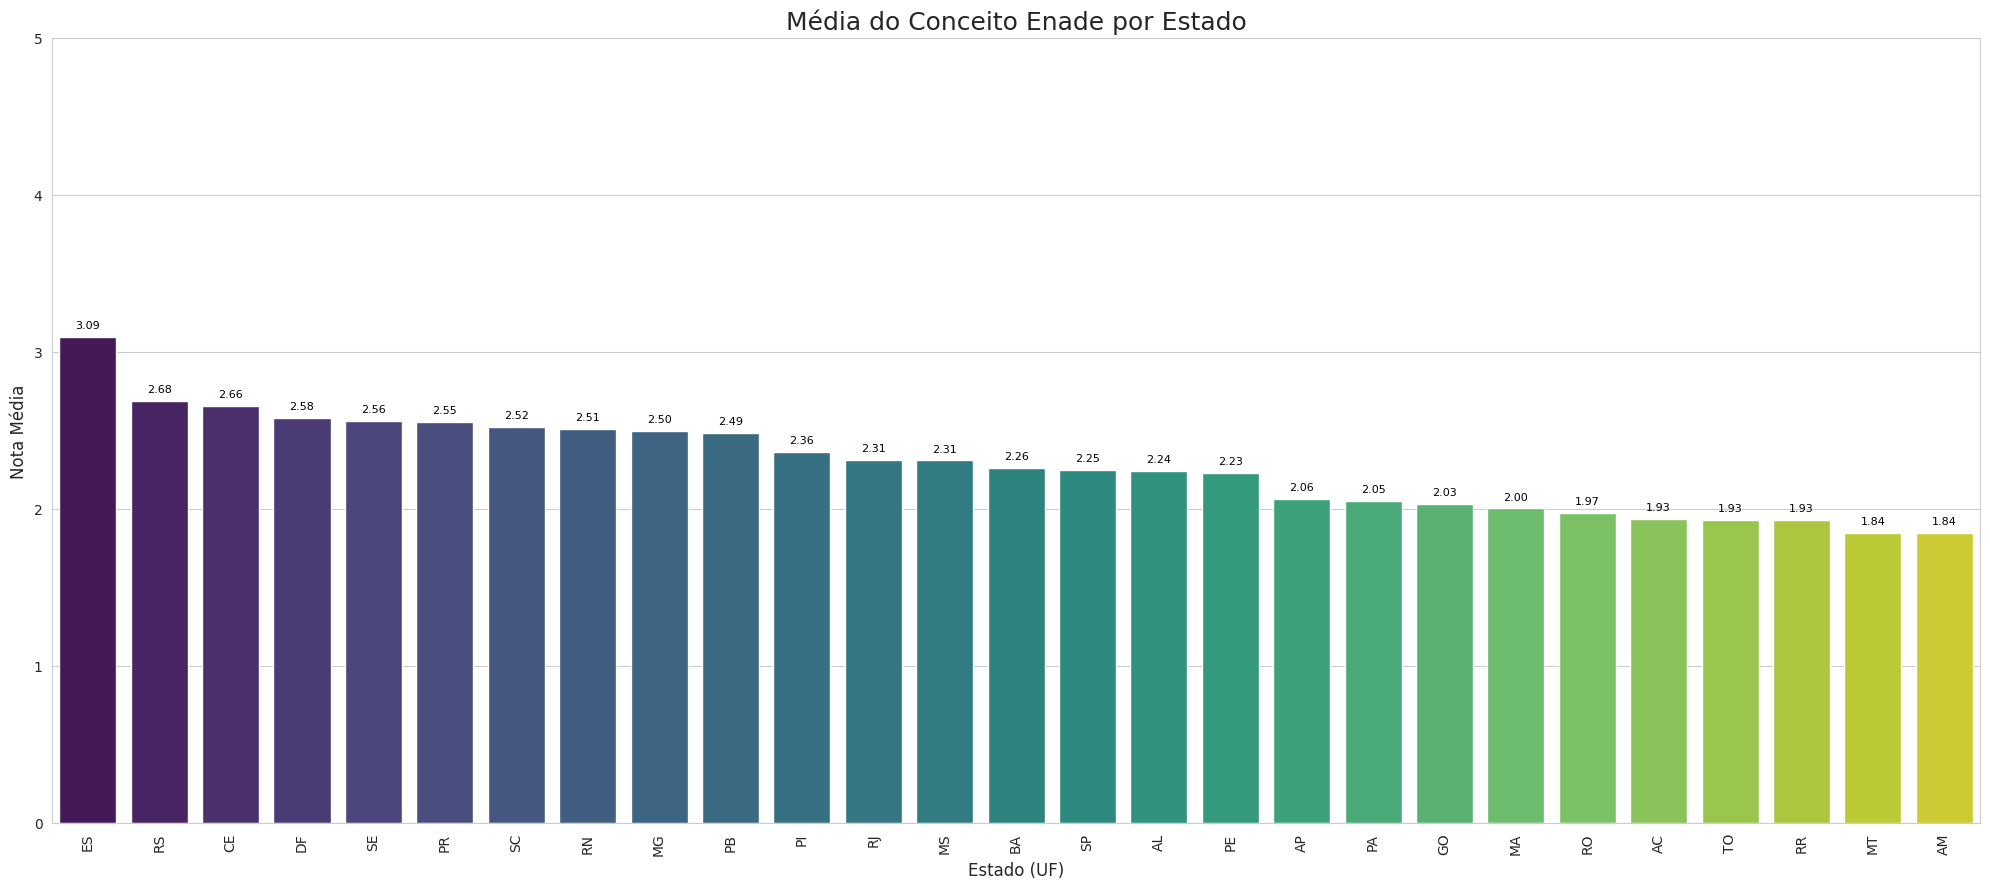


Exibindo Gráfico 2: Taxa de Abstenção (%) por Estado...


/tmp/ipython-input-1317810300.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


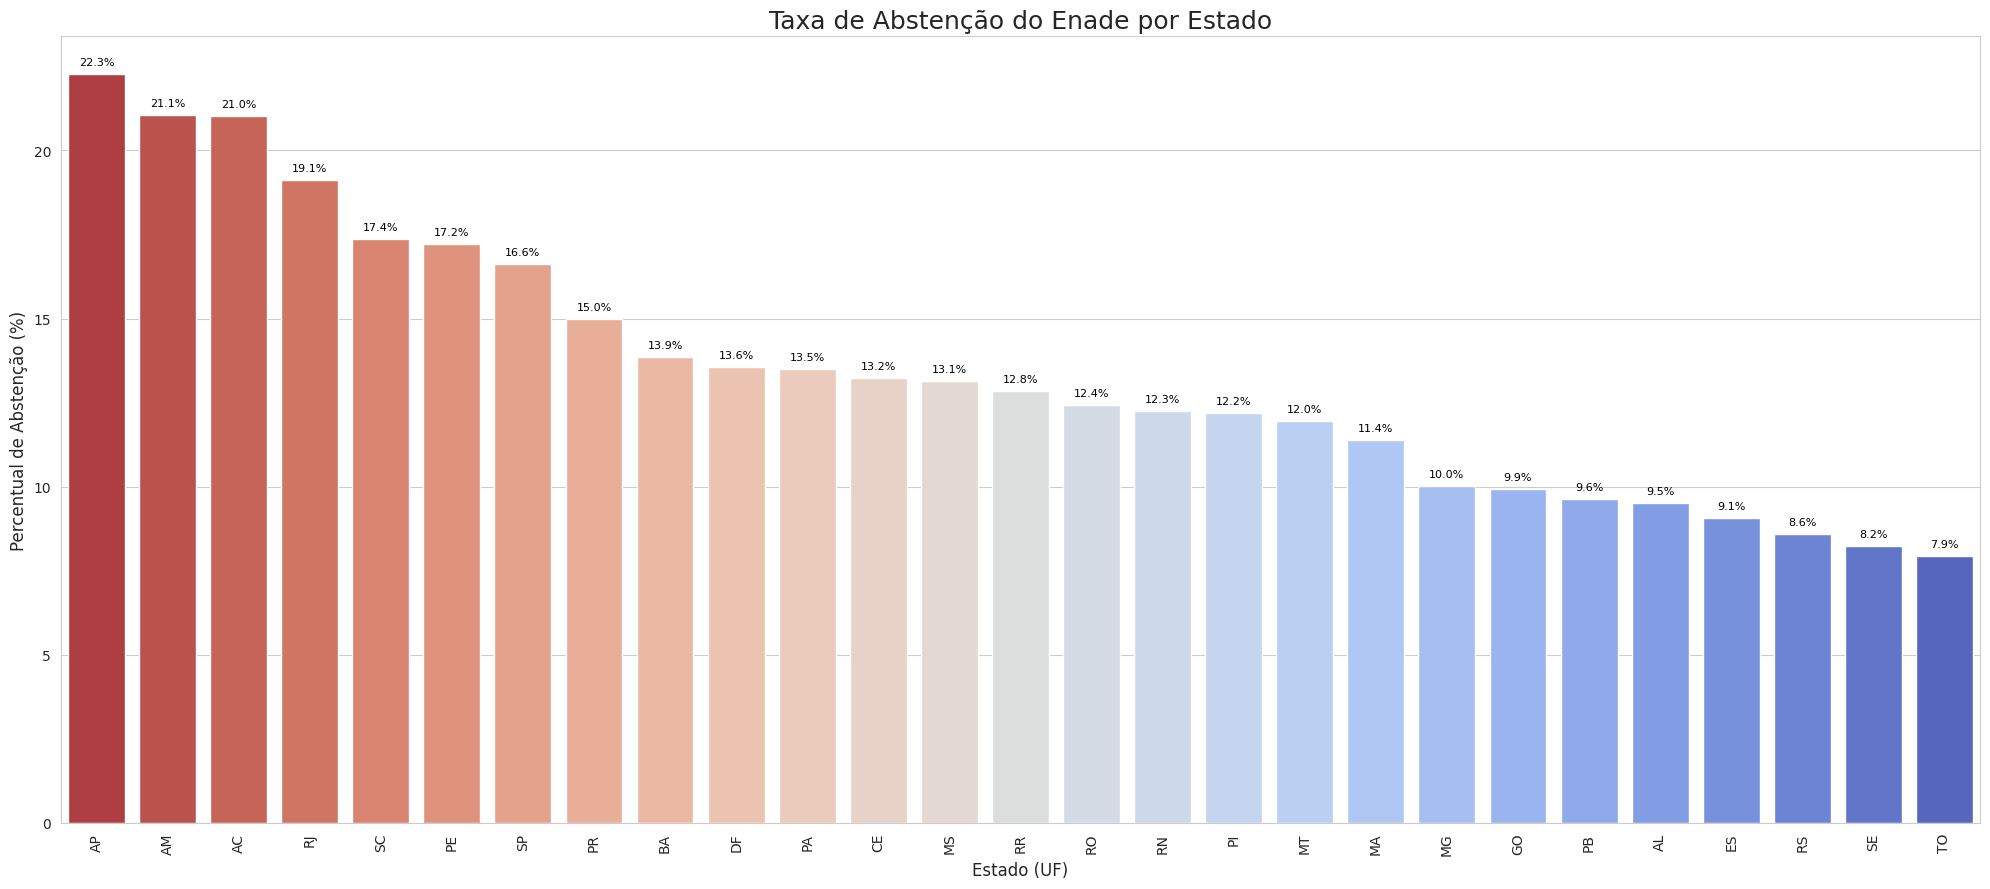

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# --- 1. Bloco de Limpeza e Preparação Centralizado (ESSENCIAL) ---
# ==============================================================================
print("Iniciando limpeza e preparação dos dados...")

# Garante que o DataFrame esteja sempre em um estado consistente e limpo
dfc = dfc.loc[:, ~dfc.columns.duplicated(keep='first')]
dfc.columns = dfc.columns.str.strip()
rename_map = {
    'Sigla da UF**': 'UF',
    'Nº de Concluintes Inscritos': 'Inscritos',
    'Nº  de Concluintes Participantes': 'Participantes', # Com espaço duplo
    'Nº de Concluintes Participantes': 'Participantes',  # Com espaço simples
}
for old_name, new_name in rename_map.items():
    if old_name in dfc.columns and new_name not in dfc.columns:
        dfc.rename(columns={old_name: new_name}, inplace=True)

# Garante que as colunas numéricas são, de fato, numéricas
numeric_cols = ['Inscritos', 'Participantes', 'Conceito Enade (Contínuo)']
for col in numeric_cols:
    if col in dfc.columns:
        dfc[col] = pd.to_numeric(dfc[col], errors='coerce')

print("Dados limpos e padronizados.")


# ==============================================================================
# --- 2. Agregação de Dados Otimizada (usando nomes limpos) ---
# ==============================================================================
# Calculamos os ausentes
dfc['Ausentes'] = dfc['Inscritos'] - dfc['Participantes']

# Agregamos todas as métricas de uma vez
df_analise_uf = dfc.groupby('UF').agg(
    Media_Conceito=('Conceito Enade (Contínuo)', 'mean'),
    Total_Inscritos=('Inscritos', 'sum'),
    Total_Ausentes=('Ausentes', 'sum')
).reset_index()

# Calculamos a taxa de abstenção com segurança
df_analise_uf['Taxa de Abstenção (%)'] = 0.0
mask_inscritos = df_analise_uf['Total_Inscritos'] > 0
df_analise_uf.loc[mask_inscritos, 'Taxa de Abstenção (%)'] = \
    (df_analise_uf.loc[mask_inscritos, 'Total_Ausentes'] / df_analise_uf.loc[mask_inscritos, 'Total_Inscritos']) * 100

print("Agregação de dados por estado concluída.")


# ==============================================================================
# --- GRÁFICO 1: Média do Conceito Enade por Estado ---
# ==============================================================================
print("\nExibindo Gráfico 1: Média do Conceito Enade por Estado...")

# Ordenando os dados pela média do conceito para este gráfico
df_ordenado_media = df_analise_uf.sort_values(by='Media_Conceito', ascending=False)

plt.figure(figsize=(20, 9))
ax1 = sns.barplot(
    x='UF', # Usando nome limpo
    y='Media_Conceito',
    data=df_ordenado_media,
    palette='viridis'
)

# Anotações
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points', fontsize=8, color='black')

# Títulos e rótulos
ax1.set_title('Média do Conceito Enade por Estado', fontsize=18)
ax1.set_xlabel('Estado (UF)', fontsize=12)
ax1.set_ylabel('Nota Média', fontsize=12)
ax1.set_ylim(0, 5)
ax1.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# ==============================================================================
# --- GRÁFICO 2: Taxa de Abstenção (%) por Estado ---
# ==============================================================================
print("\nExibindo Gráfico 2: Taxa de Abstenção (%) por Estado...")

# Ordenando os dados pela taxa de abstenção para este gráfico
df_ordenado_abstencao = df_analise_uf.sort_values(by='Taxa de Abstenção (%)', ascending=False)

plt.figure(figsize=(20, 9))
ax2 = sns.barplot(
    x='UF', # Usando nome limpo
    y='Taxa de Abstenção (%)',
    data=df_ordenado_abstencao,
    palette='coolwarm_r'
)

# Anotações
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points', fontsize=8, color='black')

# Títulos e rótulos
ax2.set_title('Taxa de Abstenção do Enade por Estado', fontsize=18)
ax2.set_xlabel('Estado (UF)', fontsize=12)
ax2.set_ylabel('Percentual de Abstenção (%)', fontsize=12)
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# dfc['Nº de Concluintes Inscritos'] = pd.to_numeric(dfc['Nº de Concluintes Inscritos'], errors='coerce')
# dfc['Nº  de Concluintes Participantes'] = pd.to_numeric(dfc['Nº  de Concluintes Participantes'], errors='coerce')
# dfc.dropna(subset=['Nº de Concluintes Inscritos', 'Nº  de Concluintes Participantes'], inplace=True) # Remove linhas onde a conversão falhou

# dfc['Nº de Ausentes'] = dfc['Nº de Concluintes Inscritos'] - dfc['Nº  de Concluintes Participantes']


# # 3.2. Análise da Abstenção por Tipo de Instituição
# # Usamos .agg() para somar múltiplos valores de uma vez, o que é mais eficiente
# abstencao_por_tipo = dfc.groupby('Tipo de Instituição').agg(
#     Total_Inscritos=('Nº de Concluintes Inscritos', 'sum'),
#     Total_Ausentes=('Nº de Ausentes', 'sum')
# ).reset_index()


# # Calculamos a taxa de abstenção em percentual
# abstencao_por_tipo['Taxa de Abstenção (%)'] = (abstencao_por_tipo['Total_Ausentes'] / abstencao_por_tipo['Total_Inscritos']) * 100

# print("\n--- Taxa de Abstenção por Tipo de Instituição ---")
# print(abstencao_por_tipo)


# # 3.3. Visualização
# plt.figure(figsize=(8, 6))
# sns.barplot(
#     data=abstencao_por_tipo,
#     x='Tipo de Instituição',
#     y='Taxa de Abstenção (%)',
#     palette='Set2'
# )
# plt.title('Taxa de Abstenção Média por Tipo de Instituição', fontsize=16)
# plt.xlabel('Tipo de Instituição', fontsize=12)
# plt.ylabel('Taxa de Abstenção (%)', fontsize=12)
# plt.show()

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Supondo que 'dfc' seja seu DataFrame já carregado.
# # Criando um exemplo que simula exatamente o seu problema, com o espaço duplo.
# data = {
#     'Tipo de Instituição': ['Pública', 'Privada', 'Pública', 'Privada'],
#     'Nº de Concluintes Inscritos': ['100', '200', '150', '250'],
#     'Nº  de Concluintes Participantes': ['80', '150', '130', '210'] # <--- AQUI, com dois espaços, como você indicou.
# }
# dfc = pd.DataFrame(data)


# # --- CORREÇÃO APLICADA AQUI ---
# # A melhor prática é renomear a coluna com o nome problemático para um nome padrão e limpo.
# # Isso torna o resto do código mais legível e menos propenso a erros.
# dfc.rename(columns={'Nº  de Concluintes Participantes': 'Nº de Concluintes Participantes'}, inplace=True)
# # A partir daqui, usamos sempre o nome limpo e corrigido com um espaço só.
# # ---------------------------------


# # Agora o resto do seu código funciona perfeitamente
# dfc['Nº de Concluintes Inscritos'] = pd.to_numeric(dfc['Nº de Concluintes Inscritos'], errors='coerce')
# # Usamos o nome limpo aqui:
# dfc['Nº de Concluintes Participantes'] = pd.to_numeric(dfc['Nº de Concluintes Participantes'], errors='coerce')

# dfc.dropna(subset=['Nº de Concluintes Inscritos', 'Nº de Concluintes Participantes'], inplace=True)

# # E aqui também:
# dfc['Nº de Ausentes'] = dfc['Nº de Concluintes Inscritos'] - dfc['Nº de Concluintes Participantes']


# # Análise da Abstenção por Tipo de Instituição
# abstencao_por_tipo = dfc.groupby('Tipo de Instituição').agg(
#     Total_Inscritos=('Nº de Concluintes Inscritos', 'sum'),
#     Total_Ausentes=('Nº de Ausentes', 'sum')
# ).reset_index()


# # Calculamos a taxa de abstenção em percentual
# abstencao_por_tipo['Taxa de Abstenção (%)'] = (abstencao_por_tipo['Total_Ausentes'] / abstencao_por_tipo['Total_Inscritos']) * 100

# print("\n--- Taxa de Abstenção por Tipo de Instituição ---")
# print(abstencao_por_tipo)


# # Visualização (exatamente como na resposta anterior, pois os dados já foram corrigidos)
# plt.figure(figsize=(8, 6))
# ax = sns.barplot(
#     data=abstencao_por_tipo,
#     x='Tipo de Instituição',
#     y='Taxa de Abstenção (%)',
#     palette='Set2'
# )

# # Anotações no gráfico
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.2f}%',
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center',
#                 va='center',
#                 xytext=(0, 9),
#                 textcoords='offset points',
#                 fontsize=12,
#                 color='black')

# plt.title('Taxa de Abstenção Média por Tipo de Instituição', fontsize=16)
# plt.xlabel('Tipo de Instituição', fontsize=12)
# plt.ylabel('Taxa de Abstenção (%)', fontsize=12)
# plt.ylim(0, max(abstencao_por_tipo['Taxa de Abstenção (%)']) * 1.15)
# plt.show()

In [ ]:
# #Leitura do codigo e exclusão de duplicatas
# df= pd.read_excel("conceito_enade_2023.xlsx")

# df_ = df.drop_duplicates()

# #Coletando as linhas que estão vazias
# linhas_vazias = df[df.isna().any(axis=1)]

# #Excluindo as linhas em que conceito enade (Faixa) == SC
# dfl = df[df['Conceito Enade (Faixa)'] != 'SC']

# #Excluindo colunas que nao seram uteis para a analise
# dfc = dfl.drop(['Código da Área','Código da IES','Sigla da IES*','Código do Curso', 'Código do Município**', 'Nota Bruta - FG', 'Nota Bruta - CE', ], axis = 1)

# mapeamento_tipo = {
#     'Pública Federal': 'Pública',
#     'Pública Estadual': 'Pública',
#     'Pública Municipal': 'Pública',
#     'Privada com fins lucrativos': 'Privada',
#     'Privada sem fins lucrativos': 'Privada',
#     'Especial': 'Privada'
# }

# dfc['Tipo de Instituição'] = dfc['Categoria Administrativa'].map(mapeamento_tipo)

In [ ]:
# # Assumindo que seu DataFrame 'dfc' já existe e está carregado com os dados corretos.

# # 1. Cálculo usando o nome EXATO da coluna com o espaço extra
# # Nenhuma alteração aqui, apenas usando o seu código original.
# participantes_por_uf = dfc.groupby('Sigla da UF** ')['Nº  de Concluintes Participantes'].sum()

# # Para uma visualização melhor, vamos ordenar do maior para o menor
# participantes_por_uf = participantes_por_uf.sort_values(ascending=False)

# # O resultado é uma "Series" do Pandas. Podemos transformá-la em um DataFrame.
# df_participantes = participantes_por_uf.reset_index(name='Total de Participantes')


# # --- Início da parte do Gráfico ---

# plt.style.use('seaborn-v0_8-whitegrid')
# plt.figure(figsize=(15, 8)) # Aumentar o tamanho do gráfico para caberem todos os estados

# # A única modificação na sua linha original é adicionar "ax =" no início
# ax = sns.barplot(
#     x='Sigla da UF** ',
#     y='Total de Participantes',
#     data=df_participantes,
#     palette='rocket'
# )

# # --- Início da adição para colocar os valores nas barras ---
# for p in ax.patches:
#     # Formata o número como um inteiro com pontos como separador de milhar
#     valor_formatado = f'{p.get_height():,.0f}'.replace(',', '.')
#     ax.annotate(valor_formatado,
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center',
#                 va='center',
#                 xytext=(0, 9),
#                 textcoords='offset points',
#                 fontsize=9)
# # --- Fim da adição ---


# plt.title('Número Total de Participantes do ENADE por Estado (UF)', fontsize=18)
# plt.xlabel('Estado (UF)', fontsize=12)
# plt.ylabel('Quantidade de Participantes', fontsize=12)
# plt.xticks(rotation=45, ha='right') # Rotaciona os nomes para não sobrepor
# plt.tight_layout() # Ajusta o layout

# plt.show()

In [ ]:
# participantes_por_uf = dfc.groupby('Sigla da UF** ')['Nº  de Concluintes Participantes'].sum()

# # Para uma visualização melhor, vamos ordenar do maior para o menor
# participantes_por_uf = participantes_por_uf.sort_values(ascending=False)

# # O resultado é uma "Series" do Pandas. Podemos transformá-la em um DataFrame.
# df_participantes = participantes_por_uf.reset_index(name='Total de Participantes')

# plt.style.use('seaborn-v0_8-whitegrid')
# # plt.figure(figsize=(15, 8)) # Aumentar o tamanho do gráfico para caberem todos os estados

# sns.barplot(
#     x='Sigla da UF** ',
#     y='Total de Participantes',
#     data=df_participantes,
#     palette='rocket'
# )

# plt.title('Número Total de Participantes do ENADE por Estado (UF)', fontsize=18)
# plt.xlabel('Estado (UF)', fontsize=12)
# plt.ylabel('Quantidade de Participantes', fontsize=12)
# plt.xticks(rotation=45, ha='right') # Rotaciona os nomes para não sobrepor
# plt.tight_layout() # Ajusta o layout

# plt.show()

In [ ]:
# plt.figure(figsize=(10, 7))
# sns.boxplot(
#     x='Tipo de Instituição',
#     y='Conceito Enade (Contínuo)',
#     data=dfc,
#     palette=['#5a9bd4', '#faa43a']
# )
# plt.title('Distribuição das Notas por Tipo de Instituição\n(Apenas Ensino Presencial)', fontsize=16)
# plt.xlabel('Tipo de Instituição', fontsize=12)
# plt.ylabel('Conceito Enade (Contínuo)', fontsize=12)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

In [ ]:
# #Leitura do codigo e exclusão de duplicatas
# df= pd.read_excel("conceito_enade_2023.xlsx")

# df_ = df.drop_duplicates()

# #Coletando as linhas que estão vazias
# linhas_vazias = df[df.isna().any(axis=1)]

# #Excluindo as linhas em que conceito enade (Faixa) == SC
# dfl = df[df['Conceito Enade (Faixa)'] != 'SC']

# #Excluindo colunas que nao seram uteis para a analise
# dfc = dfl.drop(['Código da Área','Código da IES','Sigla da IES*','Código do Curso', 'Código do Município**', 'Nota Bruta - FG', 'Nota Bruta - CE', ], axis = 1)

# mapeamento_tipo = {
#     'Pública Federal': 'Pública',
#     'Pública Estadual': 'Pública',
#     'Pública Municipal': 'Pública',
#     'Privada com fins lucrativos': 'Privada',
#     'Privada sem fins lucrativos': 'Privada',
#     'Especial': 'Privada'
# }

# dfc['Tipo de Instituição'] = dfc['Categoria Administrativa'].map(mapeamento_tipo)

In [ ]:
# # --- ANÁLISE FINAL: ESTUDO DE CASO COMPARATIVO (VERSÃO COMPLETA) ---

# print("\n" + "="*60)
# print("Iniciando Análise Final: Comparativo entre Estados-Chave")
# print("="*60)

# # --- PRÉ-REQUISITOS: Recalculando os DataFrames necessários ---
# # Para garantir que o código funcione de forma independente, vamos recalcular
# # os DataFrames de resumo que usaremos.

# # 1. Média do Conceito por UF (para criar 'df_media')
# media_por_uf_series = dfc.groupby('Sigla da UF** ')['Conceito Enade (Contínuo)'].mean()
# df_media = media_por_uf_series.reset_index(name='Média do Conceito')

# # 2. Total de Participantes por UF (para criar 'df_participantes')
# # Usando o nome da coluna já corrigido
# participantes_por_uf_series = dfc.groupby('Sigla da UF** ')['Nº  de Concluintes Participantes'].sum()
# df_participantes = participantes_por_uf_series.reset_index(name='Total de Participantes')

# # 3. Taxa de Abstenção por UF (para criar 'abstencao_por_uf')
# dfc['Nº de Ausentes'] = dfc['Nº de Concluintes Inscritos'] - dfc['Nº  de Concluintes Participantes']
# abstencao_agg = dfc.groupby('Sigla da UF** ').agg(
#     Total_Inscritos=('Nº de Concluintes Inscritos', 'sum'),
#     Total_Ausentes=('Nº de Ausentes', 'sum')
# ).reset_index()
# abstencao_agg['Taxa de Abstenção (%)'] = (abstencao_agg['Total_Ausentes'] / abstencao_agg['Total_Inscritos']) * 100
# abstencao_por_uf = abstencao_agg[['Sigla da UF** ', 'Taxa de Abstenção (%)']]

# print("DataFrames de pré-requisito calculados com sucesso.")
# # ----------------------------------------------------------------

# # PASSO 1: Identificar os estados-chave
# media_por_uf = df_media.set_index('Sigla da UF** ').sort_values(by='Média do Conceito', ascending=False)

# estado_maior_media = media_por_uf.index[0]
# estado_menor_media = media_por_uf.index[-1]
# estado_maior_volume = 'SP'

# print(f"\nEstado com Maior Média: {estado_maior_media} (Média: {media_por_uf.iloc[0].values[0]:.2f})")
# print(f"Estado com Menor Média: {estado_menor_media} (Média: {media_por_uf.iloc[-1].values[0]:.2f})")
# print(f"Estado com Maior Volume: {estado_maior_volume} (Média: {media_por_uf.loc[estado_maior_volume].values[0]:.2f})")

# estados_chave = [estado_maior_media, estado_menor_media, estado_maior_volume]


# # PASSO 2: Criar um DataFrame de resumo com todas as métricas
# df_analise_uf = pd.merge(df_participantes, df_media, on='Sigla da UF** ')
# df_analise_uf = pd.merge(df_analise_uf, abstencao_por_uf, on='Sigla da UF** ')

# # Filtrar apenas os dados dos nossos 3 estados
# df_comparativo = df_analise_uf[df_analise_uf['Sigla da UF** '].isin(estados_chave)].set_index('Sigla da UF** ')

# print("\n--- Tabela Comparativa Geral ---")
# print(df_comparativo)


# # PASSO 3: Análise da composição (Pública vs. Privada) dentro desses estados
# df_composicao = dfc[dfc['Sigla da UF** '].isin(estados_chave)]
# contagem_tipo_instituicao = df_composicao.groupby(['Sigla da UF** ', 'Tipo de Instituição']).size().unstack(fill_value=0)

# contagem_tipo_instituicao['Total'] = contagem_tipo_instituicao['Pública'] + contagem_tipo_instituicao['Privada']
# contagem_tipo_instituicao['% Pública'] = (contagem_tipo_instituicao['Pública'] / contagem_tipo_instituicao['Total']) * 100
# contagem_tipo_instituicao['% Privada'] = (contagem_tipo_instituicao['Privada'] / contagem_tipo_instituicao['Total']) * 100

# print("\n--- Composição das Instituições (Pública vs. Privada) nos Estados-Chave ---")
# print(contagem_tipo_instituicao[['% Pública', '% Privada']])


# # PASSO 4: Visualização Comparativa Direta
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Gráfico 1: Média do Conceito
# sns.barplot(
#     x=df_comparativo.index,
#     y=df_comparativo['Média do Conceito'],
#     ax=axes[0],
#     palette='viridis'
# )
# axes[0].set_title('Média do Conceito Enade', fontsize=16)
# axes[0].set_xlabel('')
# axes[0].set_ylabel('Nota Média')
# axes[0].set_ylim(0, 5)

# # Gráfico 2: Taxa de Abstenção
# sns.barplot(
#     x=df_comparativo.index,
#     y=df_comparativo['Taxa de Abstenção (%)'],
#     ax=axes[1],
#     palette='coolwarm'
# )
# axes[1].set_title('Taxa de Abstenção (%)', fontsize=16)
# axes[1].set_xlabel('')
# axes[1].set_ylabel('Percentual de Abstenção')

# for p in ax.patches:
#     # Formata o número como um inteiro com pontos como separador de milhar
#     valor_formatado = f'{p.get_height():,.0f}'.replace(',', '.')
#     ax.annotate(valor_formatado,
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center',
#                 va='center',
#                 xytext=(0, 9),
#                 textcoords='offset points',
#                 fontsize=9)

# fig.suptitle(f'Análise Comparativa: {", ".join(estados_chave)}', fontsize=20)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# (Assumindo que seu DataFrame 'dfc' já foi carregado e pré-processado)
# O código de preparação de dados permanece o mesmo
# --- PRÉ-REQUISITOS ---
media_por_uf_series = dfc.groupby('Sigla da UF** ')['Conceito Enade (Contínuo)'].mean()
df_media = media_por_uf_series.reset_index(name='Média do Conceito')

participantes_por_uf_series = dfc.groupby('Sigla da UF** ')['Nº de Concluintes Participantes'].sum()
df_participantes = participantes_por_uf_series.reset_index(name='Total de Participantes')

dfc['Nº de Concluintes Inscritos'] = pd.to_numeric(dfc['Nº de Concluintes Inscritos'], errors='coerce')
dfc['Nº de Concluintes Participantes'] = pd.to_numeric(dfc['Nº de Concluintes Participantes'], errors='coerce')
dfc['Nº de Ausentes'] = dfc['Nº de Concluintes Inscritos'] - dfc['Nº de Concluintes Participantes']
abstencao_agg = dfc.groupby('Sigla da UF** ').agg(
    Total_Inscritos=('Nº de Concluintes Inscritos', 'sum'),
    Total_Ausentes=('Nº de Ausentes', 'sum')
).reset_index()
abstencao_agg['Taxa de Abstenção (%)'] = 0.0
mask_inscritos = abstencao_agg['Total_Inscritos'] > 0
abstencao_agg.loc[mask_inscritos, 'Taxa de Abstenção (%)'] = \
    (abstencao_agg.loc[mask_inscritos, 'Total_Ausentes'] / abstencao_agg.loc[mask_inscritos, 'Total_Inscritos']) * 100
abstencao_por_uf = abstencao_agg[['Sigla da UF** ', 'Taxa de Abstenção (%)']]

# --- PASSO 2: DataFrame de resumo ---
df_analise_uf = pd.merge(df_participantes, df_media, on='Sigla da UF** ')
df_analise_uf = pd.merge(df_analise_uf, abstencao_por_uf, on='Sigla da UF** ')
df_analise_uf = df_analise_uf.sort_values(by='Média do Conceito', ascending=False)


# ==============================================================================
# --- GRÁFICO 1: Média do Conceito Enade por Estado ---
# ==============================================================================
print("\nExibindo Gráfico 1: Média do Conceito Enade por Estado...")

# 1. Criamos uma figura SÓ para este gráfico
plt.figure(figsize=(18, 8))

# 2. Criamos o gráfico e capturamos seu eixo em 'ax1'
ax1 = sns.barplot(
    x='Sigla da UF** ',
    y='Média do Conceito',
    data=df_analise_uf,
    palette='viridis'
)

# 3. Anotações para o primeiro gráfico
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', xytext=(0, 5),
                  textcoords='offset points', fontsize=7, rotation=90)

# 4. Títulos e rótulos para o primeiro gráfico
ax1.set_xlabel('Estado (UF)', fontsize=12)
ax1.set_ylabel('Nota Média', fontsize=12)
ax1.set_ylim(0, 5)
ax1.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show() # 5. Mostramos o PRIMEIRO gráfico


# ==============================================================================
# --- GRÁFICO 2: Taxa de Abstenção (%) por Estado ---
# ==============================================================================
print("\nExibindo Gráfico 2: Taxa de Abstenção (%) por Estado...")

# 1. Criamos uma SEGUNDA figura, totalmente independente
plt.figure(figsize=(18, 8))

# 2. Criamos o segundo gráfico e capturamos seu eixo em 'ax2'
ax2 = sns.barplot(
    x='Sigla da UF** ',
    y='Taxa de Abstenção (%)',
    data=df_analise_uf,
    palette='coolwarm'
)

# 3. Anotações para o segundo gráfico
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}%',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', xytext=(0, 5),
                  textcoords='offset points', fontsize=7, rotation=90)

# 4. Títulos e rótulos para o segundo gráfico
ax2.set_xlabel('Estado (UF)', fontsize=12)
ax2.set_ylabel('Percentual de Abstenção', fontsize=12)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show() # 5. Mostramos o SEGUNDO gráfico

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# (Assumindo que seu DataFrame 'dfc' já foi carregado e pré-processado)
# Adicionando um DataFrame de exemplo para o código ser executável
ufs = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
data_rows = []
for uf in ufs:
    media = 2.5 + (hash(uf) % 200) / 100  # Média entre 2.5 e 4.5
    inscritos = 1000 + (hash(uf) % 10000)
    participantes = int(inscritos * (0.8 + (hash(uf) % 15) / 100)) # Abstenção entre 5% e 20%
    data_rows.append({
        'Sigla da UF** ': uf,
        'Conceito Enade (Contínuo)': media,
        'Nº de Concluintes Inscritos': inscritos,
        'Nº  de Concluintes Participantes': participantes,
        'Tipo de Instituição': 'Pública' if hash(uf) % 2 == 0 else 'Privada'
    })
dfc = pd.DataFrame(data_rows)
if 'Nº  de Concluintes Participantes' in dfc.columns:
    dfc.rename(columns={'Nº  de Concluintes Participantes': 'Nº de Concluintes Participantes'}, inplace=True)


# --- PRÉ-REQUISITOS ---
media_por_uf_series = dfc.groupby('Sigla da UF** ')['Conceito Enade (Contínuo)'].mean()
df_media = media_por_uf_series.reset_index(name='Média do Conceito')

participantes_por_uf_series = dfc.groupby('Sigla da UF** ')['Nº de Concluintes Participantes'].sum()
df_participantes = participantes_por_uf_series.reset_index(name='Total de Participantes')

dfc['Nº de Concluintes Inscritos'] = pd.to_numeric(dfc['Nº de Concluintes Inscritos'], errors='coerce')
dfc['Nº de Concluintes Participantes'] = pd.to_numeric(dfc['Nº de Concluintes Participantes'], errors='coerce')
dfc['Nº de Ausentes'] = dfc['Nº de Concluintes Inscritos'] - dfc['Nº de Concluintes Participantes']
abstencao_agg = dfc.groupby('Sigla da UF** ').agg(
    Total_Inscritos=('Nº de Concluintes Inscritos', 'sum'),
    Total_Ausentes=('Nº de Ausentes', 'sum')
).reset_index()
abstencao_agg['Taxa de Abstenção (%)'] = 0.0
mask_inscritos = abstencao_agg['Total_Inscritos'] > 0
abstencao_agg.loc[mask_inscritos, 'Taxa de Abstenção (%)'] = \
    (abstencao_agg.loc[mask_inscritos, 'Total_Ausentes'] / abstencao_agg.loc[mask_inscritos, 'Total_Inscritos']) * 100
abstencao_por_uf = abstencao_agg[['Sigla da UF** ', 'Taxa de Abstenção (%)']]

# --- PASSO 2: DataFrame de resumo ---
df_analise_uf = pd.merge(df_participantes, df_media, on='Sigla da UF** ')
df_analise_uf = pd.merge(df_analise_uf, abstencao_por_uf, on='Sigla da UF** ')
df_analise_uf = df_analise_uf.sort_values(by='Média do Conceito', ascending=False)


# --- PASSO 4: Visualização Comparativa ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico 1: Média do Conceito
sns.barplot(
    x='Sigla da UF** ',
    y='Média do Conceito',
    data=df_analise_uf,
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Média do Conceito Enade por Estado', fontsize=16)
axes[0].set_xlabel('Estado (UF)', fontsize=12)
axes[0].set_ylabel('Nota Média', fontsize=12)
axes[0].set_ylim(0, 5)
axes[0].tick_params(axis='x', rotation=90)

# Gráfico 2: Taxa de Abstenção
sns.barplot(
    x='Sigla da UF** ',
    y='Taxa de Abstenção (%)',
    data=df_analise_uf,
    ax=axes[1],
    palette='coolwarm'
)
axes[1].set_title('Taxa de Abstenção (%) por Estado', fontsize=16)
axes[1].set_xlabel('Estado (UF)', fontsize=12)
axes[1].set_ylabel('Percentual de Abstenção', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)


# =================== CÓDIGO PARA ADICIONAR OS VALORES ===================
# Como temos muitos estados, os valores serão rotacionados para caberem melhor

# Loop 1: Anotar o Gráfico da Esquerda (Média do Conceito)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='bottom',  # Alinha pela base do texto quando rotacionado
                    xytext=(0, 5),   # Pequeno deslocamento para cima
                    textcoords='offset points',
                    fontsize=7,    # Fonte bem pequena para caber
                    rotation=90)   # Rotação de 90 graus

# Loop 2: Anotar o Gráfico da Direita (Taxa de Abstenção)
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='bottom',  # Alinha pela base do texto quando rotacionado
                    xytext=(0, 5),   # Pequeno deslocamento para cima
                    textcoords='offset points',
                    fontsize=7,    # Fonte bem pequena para caber
                    rotation=90)   # Rotação de 90 graus
# =====================================================================


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# (Assumindo que seu DataFrame 'dfc' já foi carregado e pré-processado)
# ...

# --- ANÁLISE FINAL: ESTUDO DE CASO COMPARATIVO (VERSÃO PARA TODOS OS ESTADOS) ---

print("\n" + "="*60)
print("Iniciando Análise Final: Comparativo Nacional entre todos os Estados")
print("="*60)

# --- PRÉ-REQUISITOS: Os cálculos continuam os mesmos ---
# Seus cálculos iniciais já preparam os dados para todos os estados, então eles estão perfeitos.

# 1. Média do Conceito por UF
media_por_uf_series = dfc.groupby('Sigla da UF** ')['Conceito Enade (Contínuo)'].mean()
df_media = media_por_uf_series.reset_index(name='Média do Conceito')

# 2. Total de Participantes por UF
participantes_por_uf_series = dfc.groupby('Sigla da UF** ')['Nº  de Concluintes Participantes'].sum()
df_participantes = participantes_por_uf_series.reset_index(name='Total de Participantes')

# 3. Taxa de Abstenção por UF
# Certifique-se de que a coluna 'Nº de Concluintes Inscritos' existe e é numérica
dfc['Nº de Concluintes Inscritos'] = pd.to_numeric(dfc['Nº de Concluintes Inscritos'], errors='coerce')
dfc['Nº de Ausentes'] = dfc['Nº de Concluintes Inscritos'] - dfc['Nº  de Concluintes Participantes']
abstencao_agg = dfc.groupby('Sigla da UF** ').agg(
    Total_Inscritos=('Nº de Concluintes Inscritos', 'sum'),
    Total_Ausentes=('Nº de Ausentes', 'sum')
).reset_index()
# Evitar divisão por zero
abstencao_agg['Taxa de Abstenção (%)'] = 0.0
mask_inscritos = abstencao_agg['Total_Inscritos'] > 0
abstencao_agg.loc[mask_inscritos, 'Taxa de Abstenção (%)'] = \
    (abstencao_agg.loc[mask_inscritos, 'Total_Ausentes'] / abstencao_agg.loc[mask_inscritos, 'Total_Inscritos']) * 100
abstencao_por_uf = abstencao_agg[['Sigla da UF** ', 'Taxa de Abstenção (%)']]

print("DataFrames de pré-requisito calculados com sucesso para todos os estados.")
# ----------------------------------------------------------------

# REMOVIDO: PASSO 1, que identificava apenas 3 estados-chave.

# PASSO 2: Criar um DataFrame de resumo com todas as métricas para TODOS os estados
df_analise_uf = pd.merge(df_participantes, df_media, on='Sigla da UF** ')
df_analise_uf = pd.merge(df_analise_uf, abstencao_por_uf, on='Sigla da UF** ')

# NOVO: Ordenar o DataFrame pela média do conceito para facilitar a visualização dos gráficos
df_analise_uf = df_analise_uf.sort_values(by='Média do Conceito', ascending=False)


print("\n--- Tabela Comparativa Geral (Todos os Estados) ---")
print(df_analise_uf.to_string()) # .to_string() para garantir que todas as linhas sejam impressas


# PASSO 3: Análise da composição (Pública vs. Privada) em TODOS os estados
# A lógica é a mesma, mas agora não há filtro, então ela será aplicada a todos os estados.
contagem_tipo_instituicao = dfc.groupby(['Sigla da UF** ', 'Tipo de Instituição']).size().unstack(fill_value=0)

contagem_tipo_instituicao['Total'] = contagem_tipo_instituicao.get('Pública', 0) + contagem_tipo_instituicao.get('Privada', 0)
contagem_tipo_instituicao['% Pública'] = (contagem_tipo_instituicao.get('Pública', 0) / contagem_tipo_instituicao['Total']) * 100
contagem_tipo_instituicao['% Privada'] = (contagem_tipo_instituicao.get('Privada', 0) / contagem_tipo_instituicao['Total']) * 100

print("\n--- Composição das Instituições (Pública vs. Privada) em Todos os Estados ---")
print(contagem_tipo_instituicao[['% Pública', '% Privada']].to_string())


# PASSO 4: Visualização Comparativa Direta para TODOS os estados
# AJUSTE: Aumentamos o tamanho do gráfico e rotacionamos os rótulos do eixo X para caberem todos os estados.
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # Tamanho maior

# Gráfico 1: Média do Conceito
sns.barplot(
    x='Sigla da UF** ',
    y='Média do Conceito',
    data=df_analise_uf, # Usando o DataFrame ordenado
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Média do Conceito Enade por Estado', fontsize=16)
axes[0].set_xlabel('Estado (UF)', fontsize=12)
axes[0].set_ylabel('Nota Média', fontsize=12)
axes[0].set_ylim(0, 5)
axes[0].tick_params(axis='x', rotation=90) # Rotaciona os nomes dos estados

# Gráfico 2: Taxa de Abstenção
sns.barplot(
    x='Sigla da UF** ',
    y='Taxa de Abstenção (%)',
    data=df_analise_uf, # Usando o DataFrame com a mesma ordem
    ax=axes[1],
    palette='coolwarm'
)
axes[1].set_title('Taxa de Abstenção (%) por Estado', fontsize=16)
axes[1].set_xlabel('Estado (UF)', fontsize=12)
axes[1].set_ylabel('Percentual de Abstenção', fontsize=12)
axes[1].tick_params(axis='x', rotation=90) # Rotaciona os nomes dos estados

fig.suptitle('Análise Comparativa Nacional do ENADE 2023', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuste para o título e os rótulos
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import pearsonr
# import pandas as pd # Adicionado para o exemplo

# # (Assumindo que seu DataFrame 'df_analise_uf' já foi calculado nas etapas anteriores)
# # Adicionando um DataFrame de exemplo para o código ser executável
# ufs = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
# data_rows = []
# for uf in ufs:
#     media = 2.5 + (hash(uf) % 200) / 100
#     abstencao = 10 + (hash(uf) % 150) / 10
#     data_rows.append({
#         'Sigla da UF** ': uf,
#         'Média do Conceito': media,
#         'Taxa de Abstenção (%)': abstencao
#     })
# df_analise_uf = pd.DataFrame(data_rows)


# # --- INSIGHT: Análise de Correlação entre Abstenção e Desempenho ---

# print("\n" + "="*60)
# print("Analisando a Correlação entre Taxa de Abstenção e Média da Nota")
# print("="*60)

# # PASSO 1: Calcular a correlação estatística com Pearson
# taxa_abstencao = df_analise_uf['Taxa de Abstenção (%)']
# media_conceito = df_analise_uf['Média do Conceito']
# correlation_coefficient, p_value = pearsonr(taxa_abstencao, media_conceito)

# print(f"O Coeficiente de Correlação de Pearson (r) é: {correlation_coefficient:.4f}")
# print(f"O p-valor é: {p_value:.4f}")

# # Interpretando o resultado
# if p_value < 0.05:
#     print("\nConclusão Estatística: A correlação é ESTATISTICAMENTE SIGNIFICANTE.")
#     if correlation_coefficient > 0:
#         print("-> Existe uma tendência de que estados com maior abstenção tenham médias maiores.")
#     else:
#         print("-> Existe uma tendência de que estados com maior abstenção tenham médias menores.")
# else:
#     print("\nConclusão Estatística: A correlação NÃO é estatisticamente significante.")
#     print("-> Não há evidências estatísticas fortes para afirmar que a abstenção influencia a média.")


# # PASSO 2: Gerar a prova visual com um Gráfico de Dispersão (Scatter Plot)
# plt.figure(figsize=(12, 7))

# # 1. Capturamos o eixo 'ax' ao criar o gráfico
# ax = sns.regplot(
#     data=df_analise_uf,
#     x='Taxa de Abstenção (%)',
#     y='Média do Conceito',
#     line_kws={"color": "red"}
# )

# # =================== CÓDIGO NOVO PARA ADICIONAR OS RÓTULOS ===================
# # 2. Loop para adicionar o rótulo (a sigla da UF) em cada ponto do gráfico
# for index, row in df_analise_uf.iterrows():
#     # ax.text(x, y, texto)
#     ax.text(row['Taxa de Abstenção (%)'] + 0.1, # Posição X + pequeno deslocamento para a direita
#             row['Média do Conceito'],             # Posição Y
#             row['Sigla da UF** '],               # O texto a ser exibido (a sigla do estado)
#             fontsize=9,
#             color='darkslategray', # Uma cor mais suave para não poluir o gráfico
#             fontweight='semibold')
# # ===========================================================================


# plt.title('Correlação entre Taxa de Abstenção e Média do Conceito Enade por Estado', fontsize=16)
# plt.xlabel('Taxa de Abstenção (%)', fontsize=12)
# plt.ylabel('Média do Conceito Enade', fontsize=12)
# plt.grid(True)
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import pearsonr

# # --- INSIGHT: Análise de Correlação entre Abstenção e Desempenho ---

# print("\n" + "="*60)
# print("Analisando a Correlação entre Taxa de Abstenção e Média da Nota")
# print("="*60)

# # PASSO 1: Calcular a correlação estatística com Pearson
# # Selecionamos as duas colunas que queremos comparar
# taxa_abstencao = df_analise_uf['Taxa de Abstenção (%)']
# media_conceito = df_analise_uf['Média do Conceito']

# # A função pearsonr retorna o coeficiente (r) e o p-valor
# correlation_coefficient, p_value = pearsonr(taxa_abstencao, media_conceito)

# print(f"O Coeficiente de Correlação de Pearson (r) é: {correlation_coefficient:.4f}")
# print(f"O p-valor é: {p_value:.4f}")

# # Interpretando o resultado
# if p_value < 0.05:
#     print("\nConclusão Estatística: A correlação é ESTATISTICAMENTE SIGNIFICANTE.")
#     if correlation_coefficient > 0:
#         print("-> Existe uma tendência de que estados com maior abstenção tenham médias maiores.")
#     else:
#         print("-> Existe uma tendência de que estados com maior abstenção tenham médias menores.")
# else:
#     print("\nConclusão Estatística: A correlação NÃO é estatisticamente significante.")
#     print("-> Não há evidências estatísticas fortes para afirmar que a abstenção influencia a média.")


# # PASSO 2: Gerar a prova visual com um Gráfico de Dispersão (Scatter Plot)
# plt.figure(figsize=(12, 7))

# # Usamos o regplot do seaborn, que além de plotar os pontos, já desenha uma linha de tendência
# sns.regplot(
#     data=df_analise_uf,
#     x='Taxa de Abstenção (%)',
#     y='Média do Conceito',
#     line_kws={"color": "red"} # Deixa a linha de tendência vermelha para destaque
# )

# plt.title('Correlação entre Taxa de Abstenção e Média do Conceito Enade por Estado', fontsize=16)
# plt.xlabel('Taxa de Abstenção (%)', fontsize=12)
# plt.ylabel('Média do Conceito Enade', fontsize=12)
# plt.grid(True)
# plt.show()